In [2]:
import pandas as pd
import numpy as np
# # step one, dannce alignment
import os
import sys
sys.path.append(os.path.abspath('../..'))
# from utlis.sync_utlis.mini_dannce_sync import sync_videos, align_miniscope_to_sixcam


rec_path = '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_17_05' #'/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_15_42' #'/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_01/20240910V1r_BO_11_35'
# mini_path = '/data/big_rim/mir_data/Oct3V1mini/Oct3V1mini_sorted/20241002-pmc-r2/customEntValHere/2024_10_25/17_09_14' #'/data/big_rim/mir_data/Oct3V1mini/Oct3V1mini_sorted/20241002-pmc-r2/customEntValHere/2024_10_25/15_50_39' #'/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted/20240910-V1-R/customEntValHere/2024_11_01/11_39_00'
# resultsss = sync_videos(
#     rec_path,
#     mini_path,
#     start_frame=0,
#     end_frame=500,
#     threshold_mini=15,
#     threshold_sixcam=3
# )

# align_miniscope_to_sixcam(resultsss, mini_path, rec_path)

# # step 2, load dannce alignment and then do ca alaignments, as well as svaing
# import os
# import sys
# sys.path.append(os.path.abspath('../..'))
# from utlis.sync_utlis.mini_dannce_sync import load_aligneddannce_and_process_ca_data

# rec_path = '/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_17_05' #'/data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_15_42' #'/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_01/20240910V1r_BO_11_35'
# mini_path = '/data/big_rim/mir_data/Oct3V1mini/Oct3V1mini_sorted/20241002-pmc-r2/customEntValHere/2024_10_25/17_09_14' #'/data/big_rim/mir_data/Oct3V1mini/Oct3V1mini_sorted/20241002-pmc-r2/customEntValHere/2024_10_25/15_50_39' #'/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted/20240910-V1-R/customEntValHere/2024_11_01/11_39_00'

# df_merged_with_dF_F = load_aligneddannce_and_process_ca_data(rec_path, mini_path)


hdf5_file_path = os.path.join(rec_path, 'MIR_Aligned/aligned_predictions_with_ca_and_dF_F.h5')

# Load the DataFrame from the HDF5 file
df_merged_with_dF_F = pd.read_hdf(hdf5_file_path, key='df')

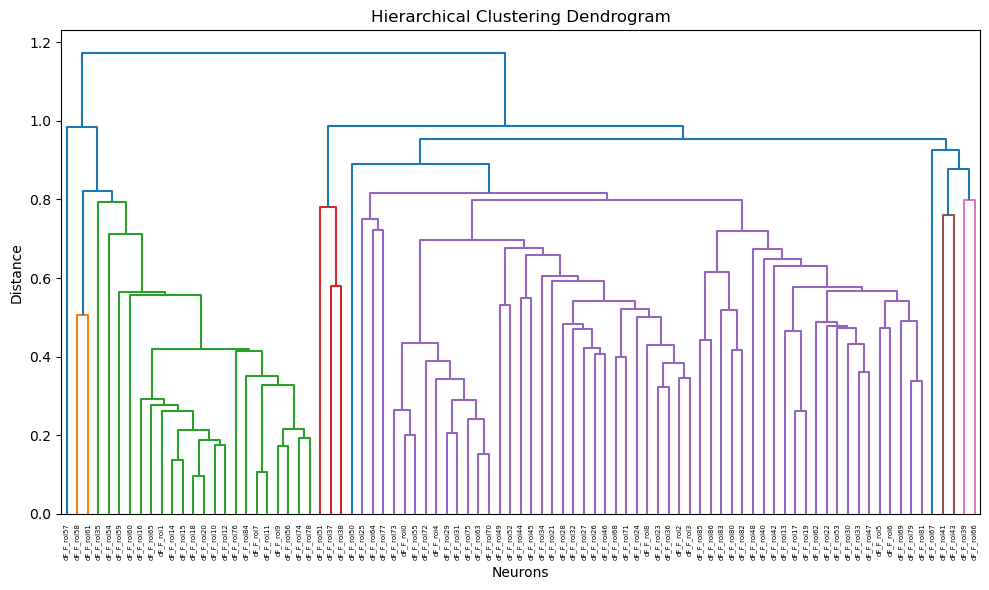

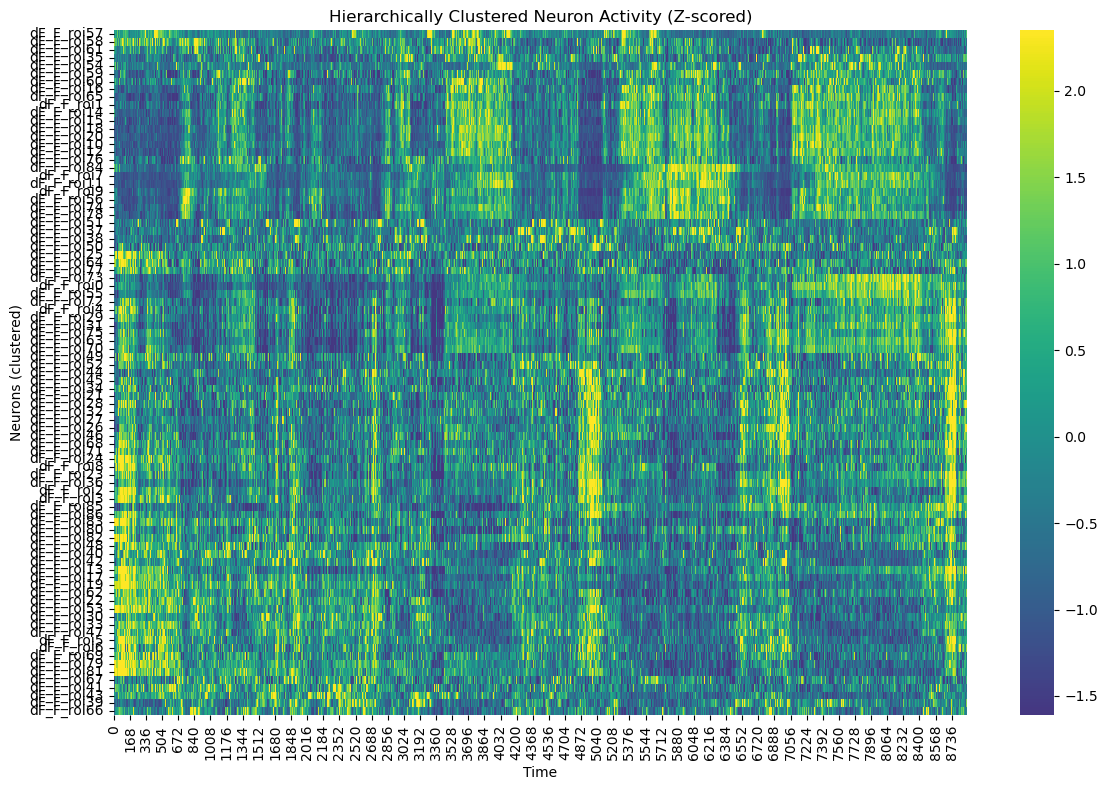

In [33]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
# from scipy.stats import zscore

# # Assuming df_merged_with_dF_F is already loaded
# # Extract columns that correspond to neurons
# neuron_columns = [col for col in df_merged_with_dF_F.columns if col.startswith('dF_F_roi')]
# neuron_activity = df_merged_with_dF_F[neuron_columns].values  # shape: (timepoints, neurons)

# # Transpose to get shape: (neurons, timepoints)
# neuron_activity = neuron_activity.T


# # Optional: Z-score normalization along each neuron's time course
# # This step ensures each neuron has mean=0 and std=1 across time.
# # It can help the clustering focus on pattern shape rather than absolute magnitude.
# neuron_activity_normalized = zscore(neuron_activity, axis=1)

# # Perform hierarchical clustering
# # 'correlation' is often a good metric for neural activity, but you can try 'euclidean'.
# # 'average' linkage is a common choice, but feel free to experiment (e.g., 'ward', 'complete').
# Z = linkage(neuron_activity_normalized, method='average', metric='correlation')

# # Plot the dendrogram to visualize the hierarchical structure
# plt.figure(figsize=(10, 6))
# dendrogram(Z, labels=neuron_columns, leaf_rotation=90)
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Neurons')
# plt.ylabel('Distance')
# plt.tight_layout()
# plt.show()

# # Once you have the dendrogram, you can get the order of the leaves (neurons)
# neuron_order = leaves_list(Z)

# # Reorder your data according to the dendrogram leaves
# neuron_activity_ordered = neuron_activity_normalized[neuron_order, :]

# # Optional: If you'd like, you can also reorder neuron_columns to match the new order
# ordered_neuron_columns = [neuron_columns[i] for i in neuron_order]

# # Plot a heatmap of the clustered neurons
# # Each row is a neuron, each column is a time point.
# plt.figure(figsize=(12, 8))
# sns.heatmap(neuron_activity_ordered, cmap='viridis', center=0, robust=True)
# plt.title('Hierarchically Clustered Neuron Activity (Z-scored)')
# plt.xlabel('Time')
# plt.ylabel('Neurons (clustered)')
# plt.yticks(np.arange(len(ordered_neuron_columns)) + 0.5, ordered_neuron_columns, rotation=0)
# plt.tight_layout()
# plt.show()

# # If you have behavior or event data aligned in the same time axis, you can plot them
# # below or above the heatmap using similar techniques as outlined before.


In [ ]:
# # step to drop low variences neurons so that we reduce a bit of false-positives?
# neuron_variances = np.var(neuron_activity, axis=1)  # Variance for each neuron
# threshold = np.percentile(neuron_variances, 5)     # Keep top 95% variance
# neuron_activity_filtered = neuron_activity[neuron_variances > threshold, :]

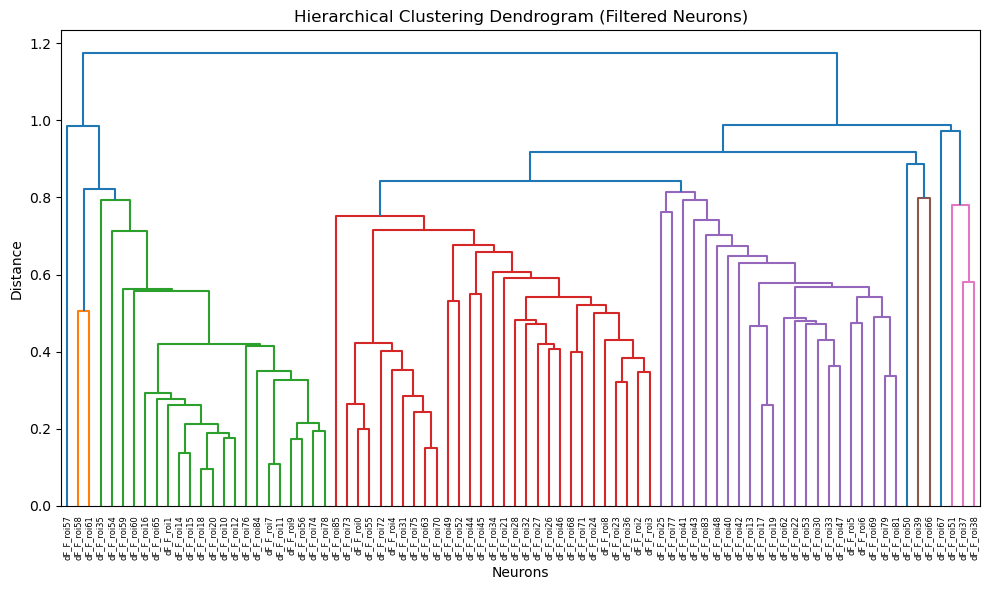

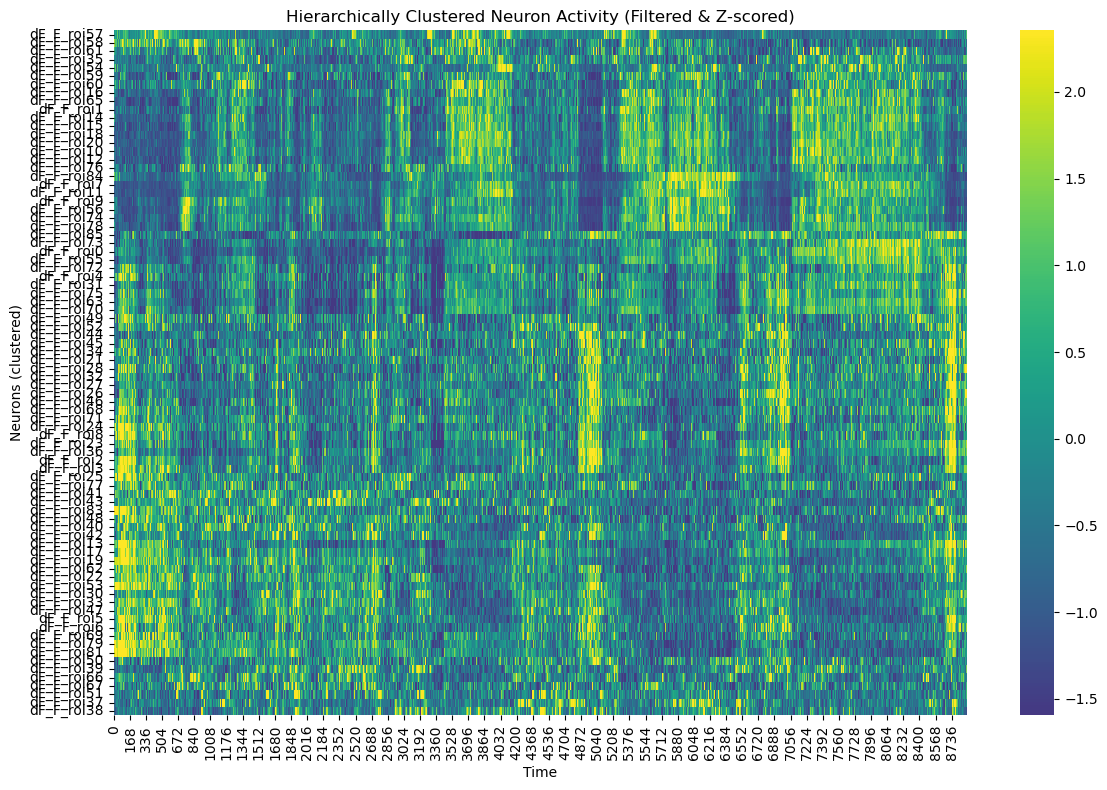

In [2]:
#added the filter low variance step
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
from scipy.stats import zscore

# Assuming df_merged_with_dF_F is already loaded
# Extract columns that correspond to neurons
neuron_columns = [col for col in df_merged_with_dF_F.columns if col.startswith('dF_F_roi')]
neuron_activity = df_merged_with_dF_F[neuron_columns].values  # shape: (timepoints, neurons)

# Transpose to get shape: (neurons, timepoints)
neuron_activity = neuron_activity.T

# Step to drop low-variance neurons (reduce false positives)
neuron_variances = np.var(neuron_activity, axis=1)  # Variance for each neuron
threshold = np.percentile(neuron_variances, 5)      # Keep top 95% variance
high_variance_indices = neuron_variances > threshold  # Mask for neurons to keep

# Filter neuron activity and neuron column names
neuron_activity_filtered = neuron_activity[high_variance_indices, :]
filtered_neuron_columns = [col for i, col in enumerate(neuron_columns) if high_variance_indices[i]]

# Optional: Z-score normalization along each neuron's time course
neuron_activity_normalized = zscore(neuron_activity_filtered, axis=1)
# 'correlation' is often a good metric for neural activity, but you can try 'euclidean'.
# 'average' linkage is a common choice, but feel free to experiment (e.g., 'ward', 'complete').
# Perform hierarchical clustering on the filtered and normalized data
Z = linkage(neuron_activity_normalized, method='average', metric='correlation')

# Plot the dendrogram to visualize the hierarchical structure
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=filtered_neuron_columns, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram (Filtered Neurons)')
plt.xlabel('Neurons')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Get the order of the leaves (neurons) from the dendrogram
neuron_order = leaves_list(Z)

# Reorder filtered and normalized neuron activity and neuron column names
neuron_activity_ordered = neuron_activity_normalized[neuron_order, :]
ordered_neuron_columns = [filtered_neuron_columns[i] for i in neuron_order]

# Plot a heatmap of the clustered neurons
plt.figure(figsize=(12, 8))
sns.heatmap(neuron_activity_ordered, cmap='viridis', center=0, robust=True)
plt.title('Hierarchically Clustered Neuron Activity (Filtered & Z-scored)')
plt.xlabel('Time')
plt.ylabel('Neurons (clustered)')
plt.yticks(np.arange(len(ordered_neuron_columns)) + 0.5, ordered_neuron_columns, rotation=0)
plt.tight_layout()
plt.show()


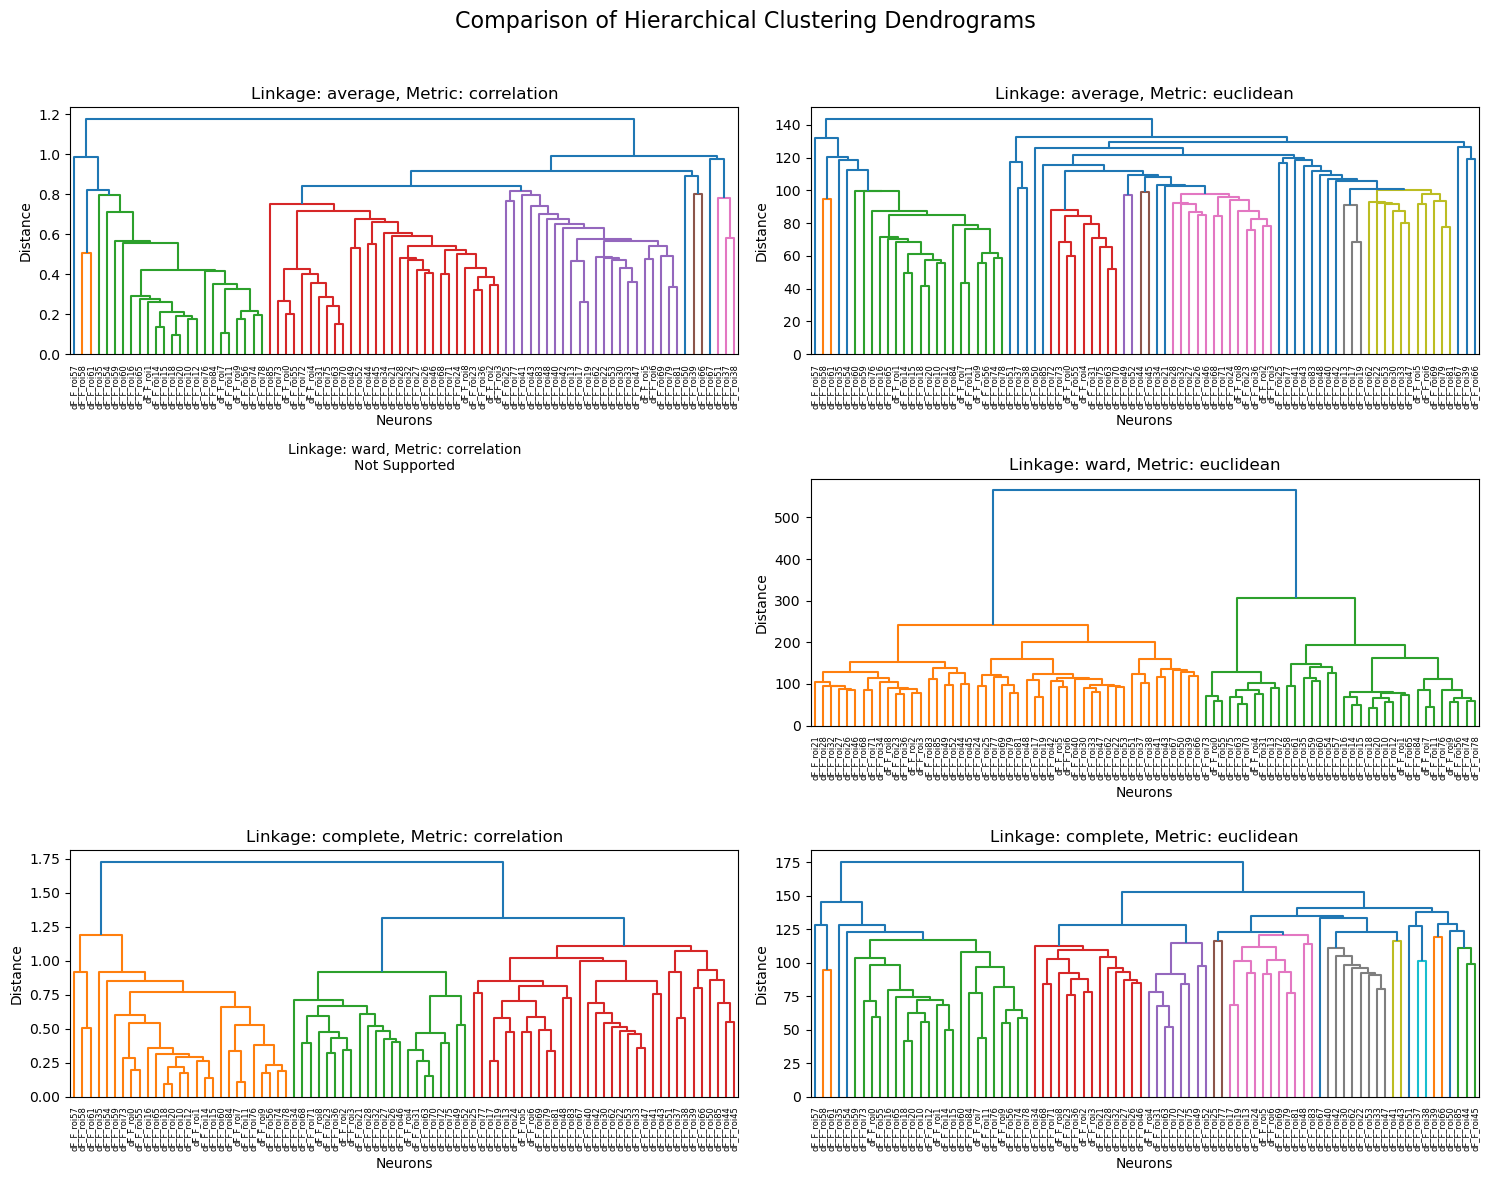

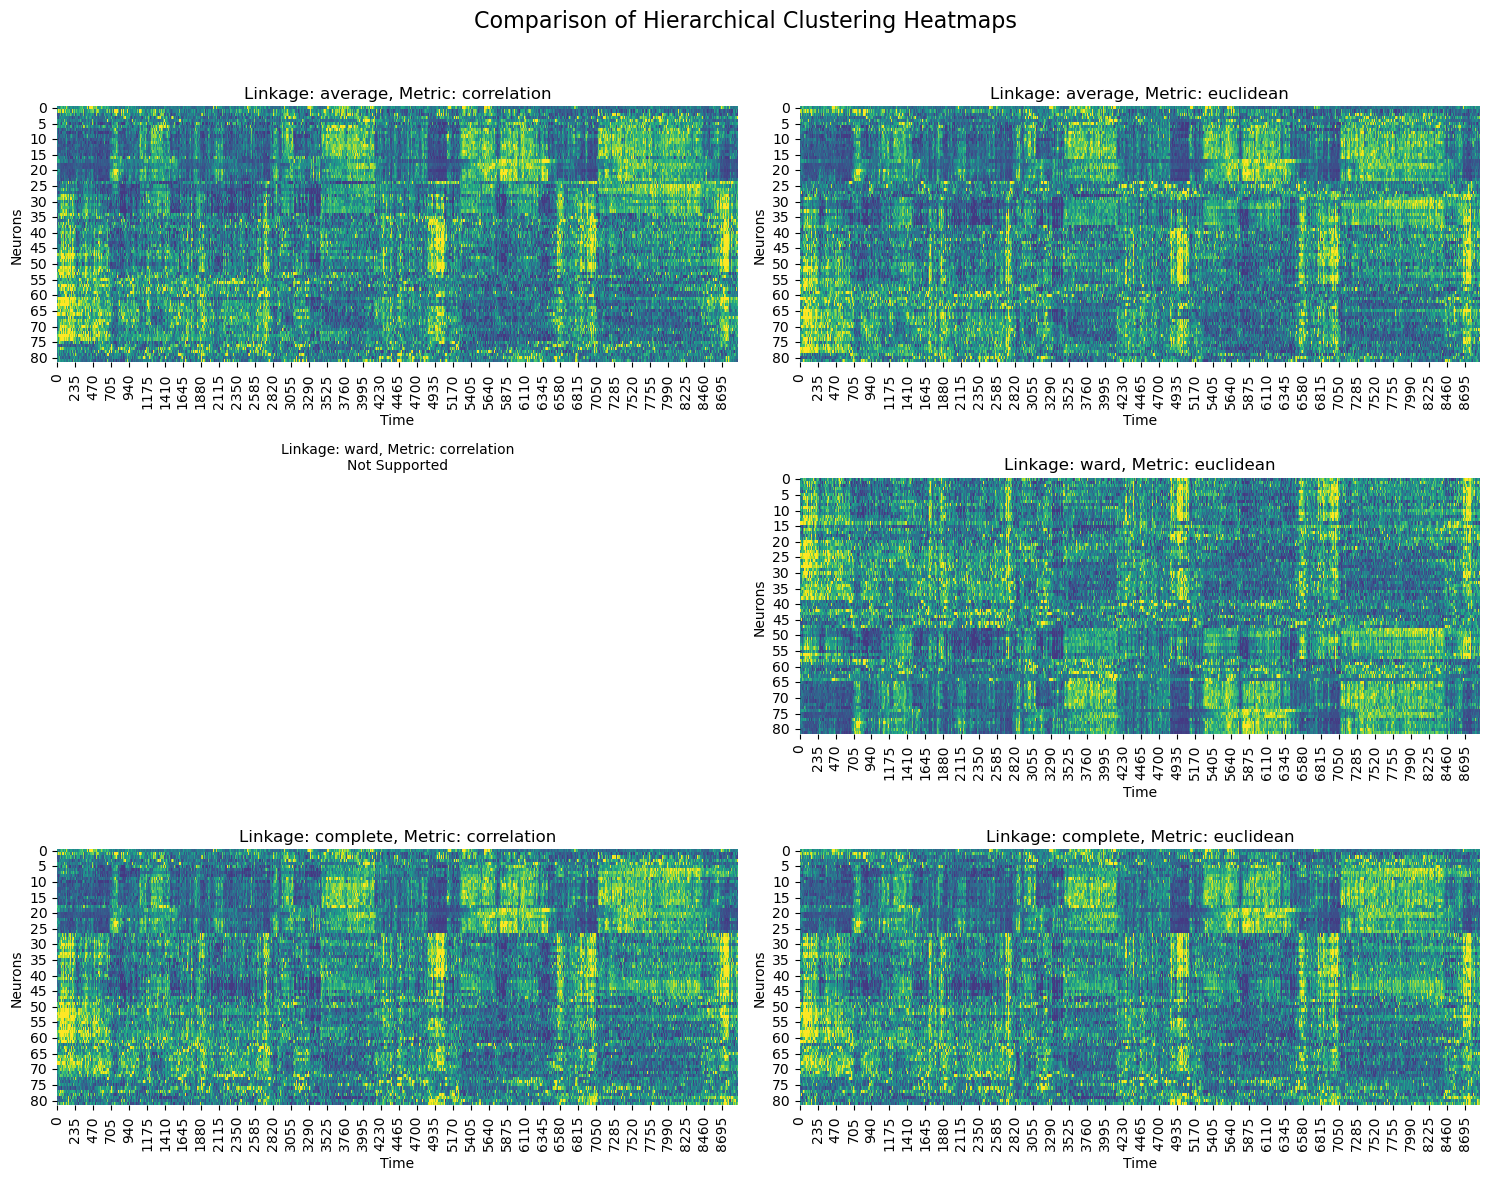

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
from scipy.stats import zscore

# Assuming df_merged_with_dF_F is already loaded
# Extract columns that correspond to neurons
neuron_columns = [col for col in df_merged_with_dF_F.columns if col.startswith('dF_F_roi')]
neuron_activity = df_merged_with_dF_F[neuron_columns].values  # shape: (timepoints, neurons)

# Transpose to get shape: (neurons, timepoints)
neuron_activity = neuron_activity.T

# Step to drop low-variance neurons (reduce false positives)
neuron_variances = np.var(neuron_activity, axis=1)
threshold = np.percentile(neuron_variances, 5)
high_variance_indices = neuron_variances > threshold

# Filter neuron activity and column names
neuron_activity_filtered = neuron_activity[high_variance_indices, :]
filtered_neuron_columns = [col for i, col in enumerate(neuron_columns) if high_variance_indices[i]]

# Z-score normalization along each neuron's time course
neuron_activity_normalized = zscore(neuron_activity_filtered, axis=1)

# Define distance metrics and linkage methods to test
distance_metrics = ['correlation', 'euclidean']
linkage_methods = ['average', 'ward', 'complete']

# Create a figure for dendrogram comparison
fig, axes = plt.subplots(len(linkage_methods), len(distance_metrics), figsize=(15, 12))
fig.suptitle('Comparison of Hierarchical Clustering Dendrograms', fontsize=16)

# Compare all combinations of metrics and linkage methods
for i, method in enumerate(linkage_methods):
    for j, metric in enumerate(distance_metrics):
        if method == 'ward' and metric != 'euclidean':
            # Skip incompatible combinations
            axes[i, j].axis('off')
            axes[i, j].set_title(f"Linkage: {method}, Metric: {metric}\nNot Supported", fontsize=10)
            continue
        
        # Perform hierarchical clustering
        Z = linkage(neuron_activity_normalized, method=method, metric=metric)
        
        # Plot the dendrogram
        ax = axes[i, j]
        dendrogram(Z, labels=filtered_neuron_columns, leaf_rotation=90, ax=ax, no_plot=False)
        ax.set_title(f"Linkage: {method}, Metric: {metric}")
        ax.set_xlabel('Neurons')
        ax.set_ylabel('Distance')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Compare heatmaps
fig, axes = plt.subplots(len(linkage_methods), len(distance_metrics), figsize=(15, 12))
fig.suptitle('Comparison of Hierarchical Clustering Heatmaps', fontsize=16)

for i, method in enumerate(linkage_methods):
    for j, metric in enumerate(distance_metrics):
        if method == 'ward' and metric != 'euclidean':
            # Skip incompatible combinations
            axes[i, j].axis('off')
            axes[i, j].set_title(f"Linkage: {method}, Metric: {metric}\nNot Supported", fontsize=10)
            continue
        
        # Perform hierarchical clustering
        Z = linkage(neuron_activity_normalized, method=method, metric=metric)
        neuron_order = leaves_list(Z)
        
        # Reorder the data
        neuron_activity_ordered = neuron_activity_normalized[neuron_order, :]
        ordered_neuron_columns = [filtered_neuron_columns[k] for k in neuron_order]
        
        # Plot the heatmap
        ax = axes[i, j]
        sns.heatmap(neuron_activity_ordered, cmap='viridis', center=0, robust=True, ax=ax, cbar=False)
        ax.set_title(f"Linkage: {method}, Metric: {metric}")
        ax.set_xlabel('Time')
        ax.set_ylabel('Neurons')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


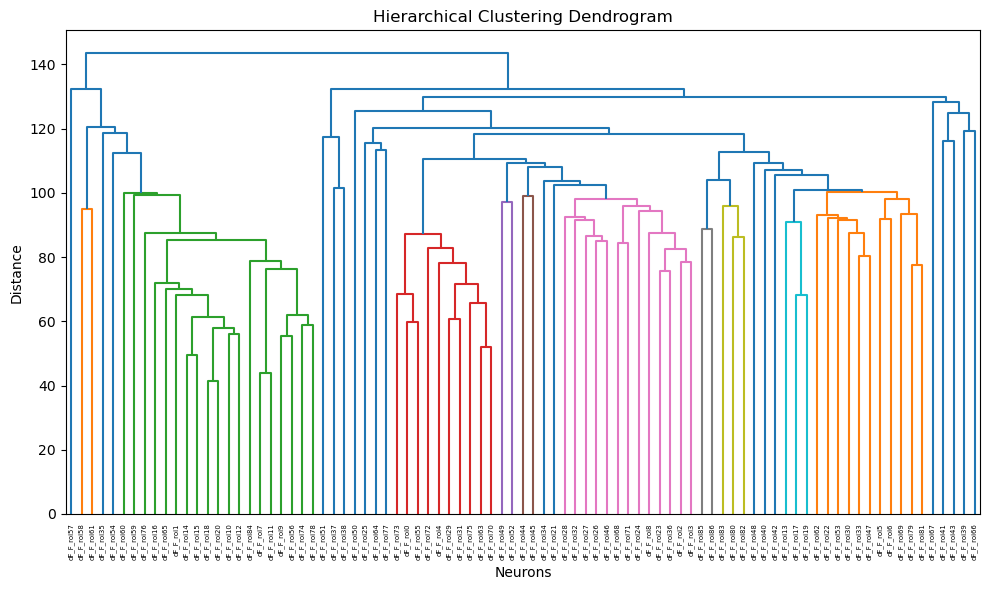

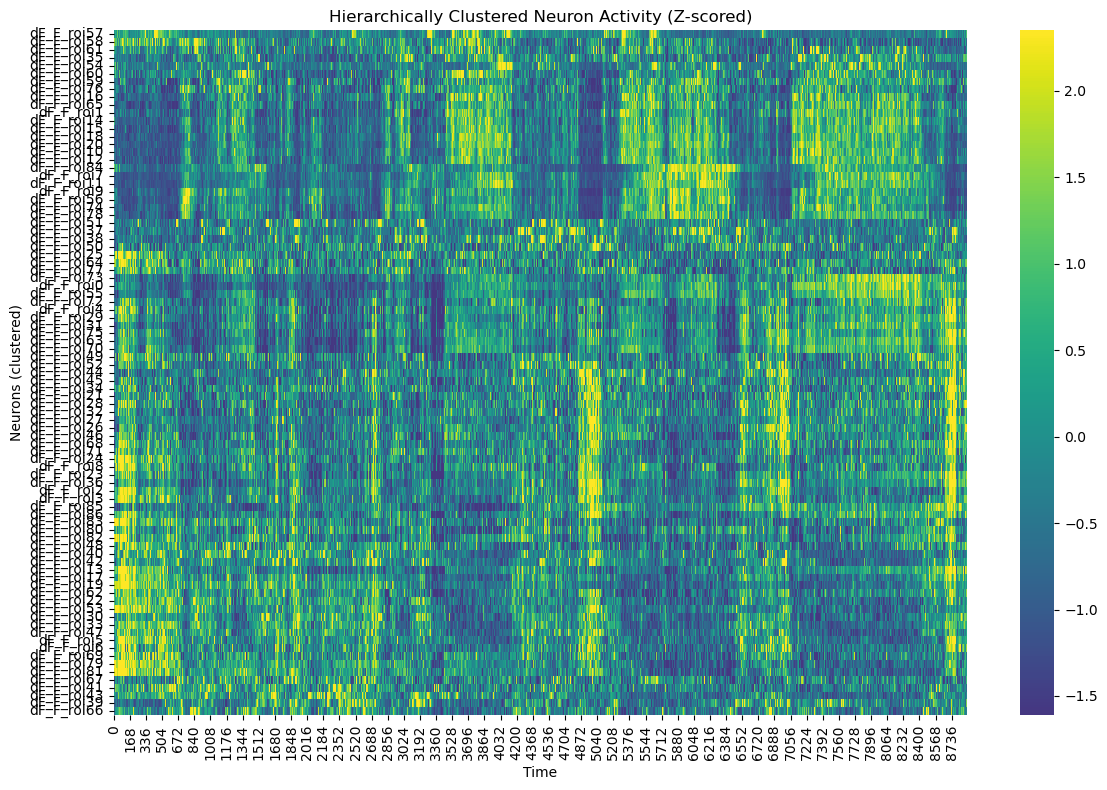

In [ ]:
# Z = linkage(neuron_activity_normalized, method='average', metric='euclidean')

# # Plot the dendrogram to visualize the hierarchical structure
# plt.figure(figsize=(10, 6))
# dendrogram(Z, labels=neuron_columns, leaf_rotation=90)
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Neurons')
# plt.ylabel('Distance')
# plt.tight_layout()
# plt.show()

# # Once you have the dendrogram, you can get the order of the leaves (neurons)
# neuron_order = leaves_list(Z)

# # Reorder your data according to the dendrogram leaves
# neuron_activity_ordered = neuron_activity_normalized[neuron_order, :]

# # Optional: If you'd like, you can also reorder neuron_columns to match the new order
# ordered_neuron_columns = [neuron_columns[i] for i in neuron_order]

# # Plot a heatmap of the clustered neurons
# # Each row is a neuron, each column is a time point.
# plt.figure(figsize=(12, 8))
# sns.heatmap(neuron_activity_ordered, cmap='viridis', center=0, robust=True)
# plt.title('Hierarchically Clustered Neuron Activity (Z-scored)')
# plt.xlabel('Time')
# plt.ylabel('Neurons (clustered)')
# plt.yticks(np.arange(len(ordered_neuron_columns)) + 0.5, ordered_neuron_columns, rotation=0)
# plt.tight_layout()
# plt.show()

Columns in df_new: ['com_x', 'com_y', 'com_z', 'kp1_x', 'kp1_y', 'kp1_z', 'kp2_x', 'kp2_y', 'kp2_z', 'kp3_x', 'kp3_y', 'kp3_z', 'kp4_x', 'kp4_y', 'kp4_z', 'kp5_x', 'kp5_y', 'kp5_z', 'kp6_x', 'kp6_y', 'kp6_z', 'kp7_x', 'kp7_y', 'kp7_z', 'kp8_x', 'kp8_y', 'kp8_z', 'kp9_x', 'kp9_y', 'kp9_z', 'kp10_x', 'kp10_y', 'kp10_z', 'kp11_x', 'kp11_y', 'kp11_z', 'kp12_x', 'kp12_y', 'kp12_z', 'kp13_x', 'kp13_y', 'kp13_z', 'kp14_x', 'kp14_y', 'kp14_z', 'kp15_x', 'kp15_y', 'kp15_z', 'kp16_x', 'kp16_y', 'kp16_z', 'kp17_x', 'kp17_y', 'kp17_z', 'kp18_x', 'kp18_y', 'kp18_z', 'kp19_x', 'kp19_y', 'kp19_z', 'kp20_x', 'kp20_y', 'kp20_z', 'kp21_x', 'kp21_y', 'kp21_z', 'kp22_x', 'kp22_y', 'kp22_z', 'calcium_roi0', 'calcium_roi1', 'calcium_roi2', 'calcium_roi3', 'calcium_roi4', 'calcium_roi5', 'calcium_roi6', 'calcium_roi7', 'calcium_roi8', 'calcium_roi9', 'calcium_roi10', 'calcium_roi11', 'calcium_roi12', 'calcium_roi13', 'calcium_roi14', 'calcium_roi15', 'calcium_roi16', 'calcium_roi17', 'calcium_roi18', 'calciu

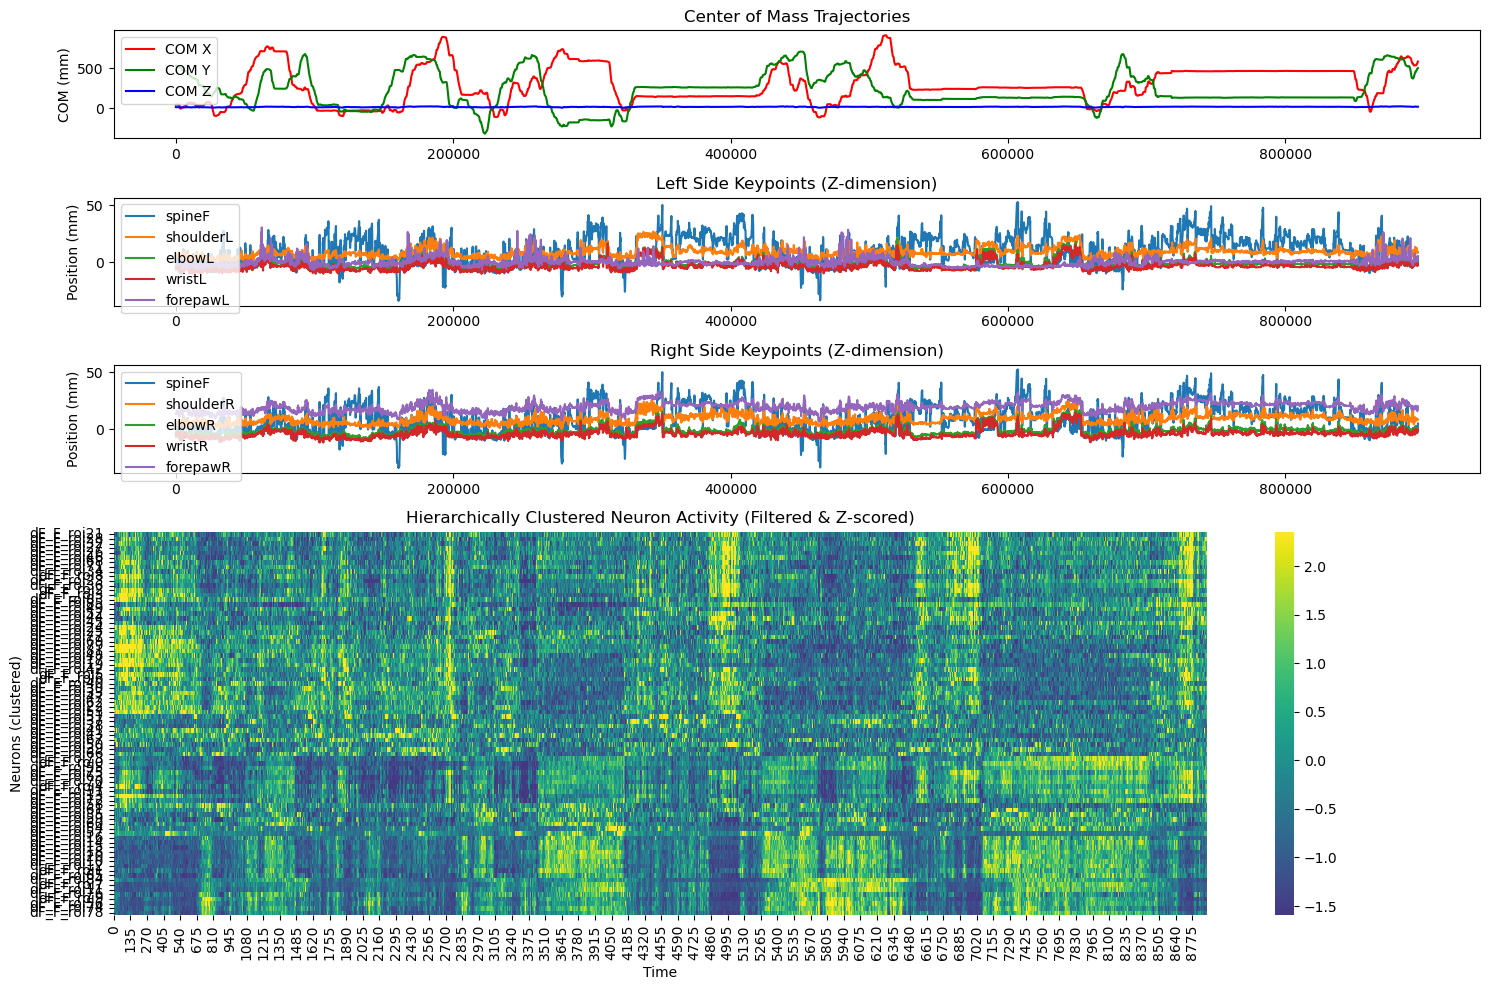

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import linkage, leaves_list
# %matplotlib inline


df_new = df_merged_with_dF_F
# Example location indices and labels
location_indices_left = [3, 11, 10, 9, 8]
location_labels_left = {3: "spineF", 11: "shoulderL", 10: "elbowL", 9: "wristL", 8: "forepawL"}

location_indices_right = [3, 15, 14, 13, 12]
location_labels_right = {3: "spineF", 15: "shoulderR", 14: "elbowR", 13: "wristR", 12: "forepawR"}

time = df_new.index  # Assuming time is the index
print("Columns in df_new:", df_new.columns.tolist())  # Debug info

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(nrows=5, ncols=1, height_ratios=[1.5, 1.5, 1.5, 1.5, 3])

###########################################
# Top Plot: COM trajectories
###########################################
ax1 = fig.add_subplot(gs[0, 0])
if 'com_x' in df_new.columns and 'com_y' in df_new.columns and 'com_z' in df_new.columns:
    ax1.plot(time, df_new['com_x'], color='red', label='COM X')
    ax1.plot(time, df_new['com_y'], color='green', label='COM Y')
    ax1.plot(time, df_new['com_z'], color='blue', label='COM Z')
    ax1.set_ylabel('COM (mm)')
    ax1.set_title('Center of Mass Trajectories')
    ax1.legend(loc='upper left')
else:
    print("COM columns not found (com_x, com_y, com_z). Check your DataFrame.")

###########################################
# Second Plot: Left Side Keypoints (Z-dim)
###########################################
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax2.set_title('Left Side Keypoints (Z-dimension)')
for idx in location_indices_left:
    z_col = f'kp{idx}_z'
    if z_col in df_new.columns:
        ax2.plot(time, df_new[z_col], label=location_labels_left[idx])
    else:
        print(f"Warning: {z_col} not found for idx={idx}")
ax2.set_ylabel('Position (mm)')
ax2.legend(loc='upper left')

###########################################
# Third Plot: Right Side Keypoints (Z-dim)
###########################################
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
ax3.set_title('Right Side Keypoints (Z-dimension)')
for idx in location_indices_right:
    z_col = f'kp{idx}_z'
    if z_col in df_new.columns:
        ax3.plot(time, df_new[z_col], label=location_labels_right[idx])
    else:
        print(f"Warning: {z_col} not found for idx={idx}")
ax3.set_ylabel('Position (mm)')
ax3.legend(loc='upper left')

###########################################
# Fourth Plot: Heatmap of Clustered Neurons
###########################################
# Hierarchical Clustering
if 'neuron_activity_normalized' in globals() and neuron_activity_normalized is not None:
    Z = linkage(neuron_activity_normalized, method='ward')  # Hierarchical clustering
    neuron_order = leaves_list(Z)  # Get the order of the leaves
    neuron_activity_ordered = neuron_activity_normalized[neuron_order, :]
    ordered_neuron_columns = [filtered_neuron_columns[i] for i in neuron_order]

    # Plot Heatmap
    ax4 = fig.add_subplot(gs[3:5, 0])  # Use larger space for the heatmap
    sns.heatmap(neuron_activity_ordered, cmap='viridis', center=0, robust=True, ax=ax4)
    ax4.set_title('Hierarchically Clustered Neuron Activity (Filtered & Z-scored)')
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Neurons (clustered)')
    ax4.set_yticks(np.arange(len(ordered_neuron_columns)) + 0.5)
    ax4.set_yticklabels(ordered_neuron_columns, rotation=0)
else:
    print("Neuron activity data not found. Skipping heatmap plot.")
    ax4 = fig.add_subplot(gs[3:5, 0])
    ax4.text(0.5, 0.5, 'No neuron activity data available.',
             transform=ax4.transAxes, ha='center', va='center')

plt.tight_layout()
plt.show()


Columns in df_new: ['com_x', 'com_y', 'com_z', 'kp1_x', 'kp1_y', 'kp1_z', 'kp2_x', 'kp2_y', 'kp2_z', 'kp3_x', 'kp3_y', 'kp3_z', 'kp4_x', 'kp4_y', 'kp4_z', 'kp5_x', 'kp5_y', 'kp5_z', 'kp6_x', 'kp6_y', 'kp6_z', 'kp7_x', 'kp7_y', 'kp7_z', 'kp8_x', 'kp8_y', 'kp8_z', 'kp9_x', 'kp9_y', 'kp9_z', 'kp10_x', 'kp10_y', 'kp10_z', 'kp11_x', 'kp11_y', 'kp11_z', 'kp12_x', 'kp12_y', 'kp12_z', 'kp13_x', 'kp13_y', 'kp13_z', 'kp14_x', 'kp14_y', 'kp14_z', 'kp15_x', 'kp15_y', 'kp15_z', 'kp16_x', 'kp16_y', 'kp16_z', 'kp17_x', 'kp17_y', 'kp17_z', 'kp18_x', 'kp18_y', 'kp18_z', 'kp19_x', 'kp19_y', 'kp19_z', 'kp20_x', 'kp20_y', 'kp20_z', 'kp21_x', 'kp21_y', 'kp21_z', 'kp22_x', 'kp22_y', 'kp22_z', 'calcium_roi0', 'calcium_roi1', 'calcium_roi2', 'calcium_roi3', 'calcium_roi4', 'calcium_roi5', 'calcium_roi6', 'calcium_roi7', 'calcium_roi8', 'calcium_roi9', 'calcium_roi10', 'calcium_roi11', 'calcium_roi12', 'calcium_roi13', 'calcium_roi14', 'calcium_roi15', 'calcium_roi16', 'calcium_roi17', 'calcium_roi18', 'calciu

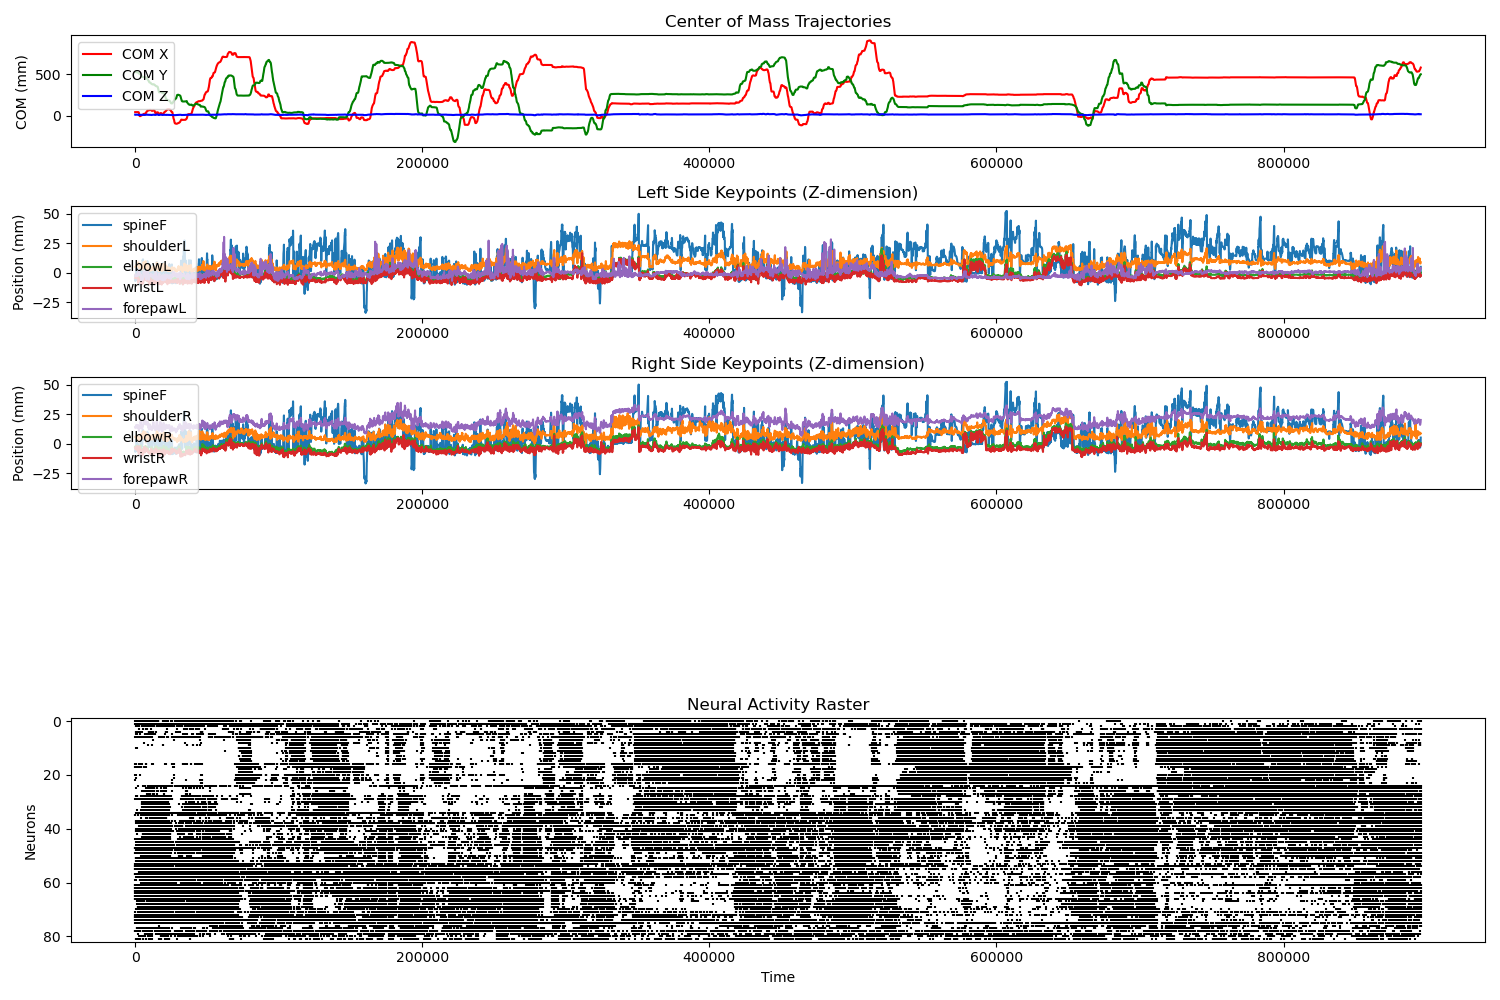

In [9]:
# import matplotlib.pyplot as plt
# df_new = df_merged_with_dF_F
# # Example location indices and labels
# location_indices_left = [3, 11, 10, 9, 8]
# location_labels_left = {3: "spineF", 11: "shoulderL", 10: "elbowL", 9: "wristL", 8: "forepawL"}

# location_indices_right = [3, 15, 14, 13, 12] 
# location_labels_right = {3: "spineF", 15: "shoulderR", 14: "elbowR", 13: "wristR", 12: "forepawR"}

# time = df_new.index  # Assuming time is the index
# print("Columns in df_new:", df_new.columns.tolist())  # Debug info

# fig = plt.figure(figsize=(15, 10))
# gs = fig.add_gridspec(nrows=5, ncols=1, height_ratios=[1.5, 1.5, 1.5, 1.5, 3])

# ###########################################
# # Top Plot: COM trajectories
# ###########################################
# ax1 = fig.add_subplot(gs[0, 0])
# if 'com_x' in df_new.columns and 'com_y' in df_new.columns and 'com_z' in df_new.columns:
#     ax1.plot(time, df_new['com_x'], color='red', label='COM X')
#     ax1.plot(time, df_new['com_y'], color='green', label='COM Y')
#     ax1.plot(time, df_new['com_z'], color='blue', label='COM Z')
#     ax1.set_ylabel('COM (mm)')
#     ax1.set_title('Center of Mass Trajectories')
#     ax1.legend(loc='upper left')
# else:
#     print("COM columns not found (com_x, com_y, com_z). Check your DataFrame.")

# ###########################################
# # Second Plot: Left Side Keypoints (Z-dim)
# ###########################################
# ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
# ax2.set_title('Left Side Keypoints (Z-dimension)')
# for idx in location_indices_left:
#     z_col = f'kp{idx}_z'
#     if z_col in df_new.columns:
#         ax2.plot(time, df_new[z_col], label=location_labels_left[idx])
#     else:
#         print(f"Warning: {z_col} not found for idx={idx}")
# ax2.set_ylabel('Position (mm)')
# ax2.legend(loc='upper left')

# ###########################################
# # Third Plot: Right Side Keypoints (Z-dim)
# ###########################################
# ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
# ax3.set_title('Right Side Keypoints (Z-dimension)')
# for idx in location_indices_right:
#     z_col = f'kp{idx}_z'
#     if z_col in df_new.columns:
#         ax3.plot(time, df_new[z_col], label=location_labels_right[idx])
#     else:
#         print(f"Warning: {z_col} not found for idx={idx}")
# ax3.set_ylabel('Position (mm)')
# ax3.legend(loc='upper left')

# ###########################################
# # Fourth Plot: Each Keypoint on Its Own Subplot (Optional)
# # If you want many long graphs, you can do something like this:
# ###########################################
# # Example: Plot each left-side keypoint X/Y/Z in its own subplot
# # We'll just show how to do one keypoint for demonstration. You can loop over all.
# """
# start_row = 3  # starting row in the gridspec for individual keypoint plots
# for i, idx in enumerate(location_indices_left):
#     ax = fig.add_subplot(gs[start_row+i, 0], sharex=ax1)
#     # Attempt to plot x, y, z if available
#     for axis_col in ['x', 'y', 'z']:
#         col_name = f'kp{idx}_{axis_col}'
#         if col_name in df_new.columns:
#             ax.plot(time, df_new[col_name], label=f'{location_labels_left[idx]} {axis_col.upper()}')
#         else:
#             print(f"Warning: {col_name} not found.")
#     ax.set_ylabel('Position (mm)')
#     ax.set_title(f'{location_labels_left[idx]} Positions')
#     ax.legend(loc='upper left')
# """

# ###########################################
# # Fifth Plot: Neural Raster (If available)
# ###########################################
# ax4 = fig.add_subplot(gs[4, 0], sharex=ax1)
# threshold = 0.5
# if 'neuron_activity_ordered' in globals() and neuron_activity_ordered is not None:
#     for neuron_idx, row in enumerate(neuron_activity_ordered):
#         spike_times = np.where(row > threshold)[0]
#         ax4.scatter(time[spike_times], np.full_like(spike_times, neuron_idx), 
#                     s=2, color='black', marker='|')
#     ax4.set_ylabel('Neurons')
#     ax4.set_xlabel('Time')
#     ax4.set_title('Neural Activity Raster')
#     ax4.set_ylim([-1, neuron_activity_ordered.shape[0]])
#     ax4.invert_yaxis()
# else:
#     ax4.text(0.5, 0.5, 'No neuron_activity_ordered data available.',
#              transform=ax4.transAxes, ha='center', va='center')

# plt.tight_layout()
# plt.show()


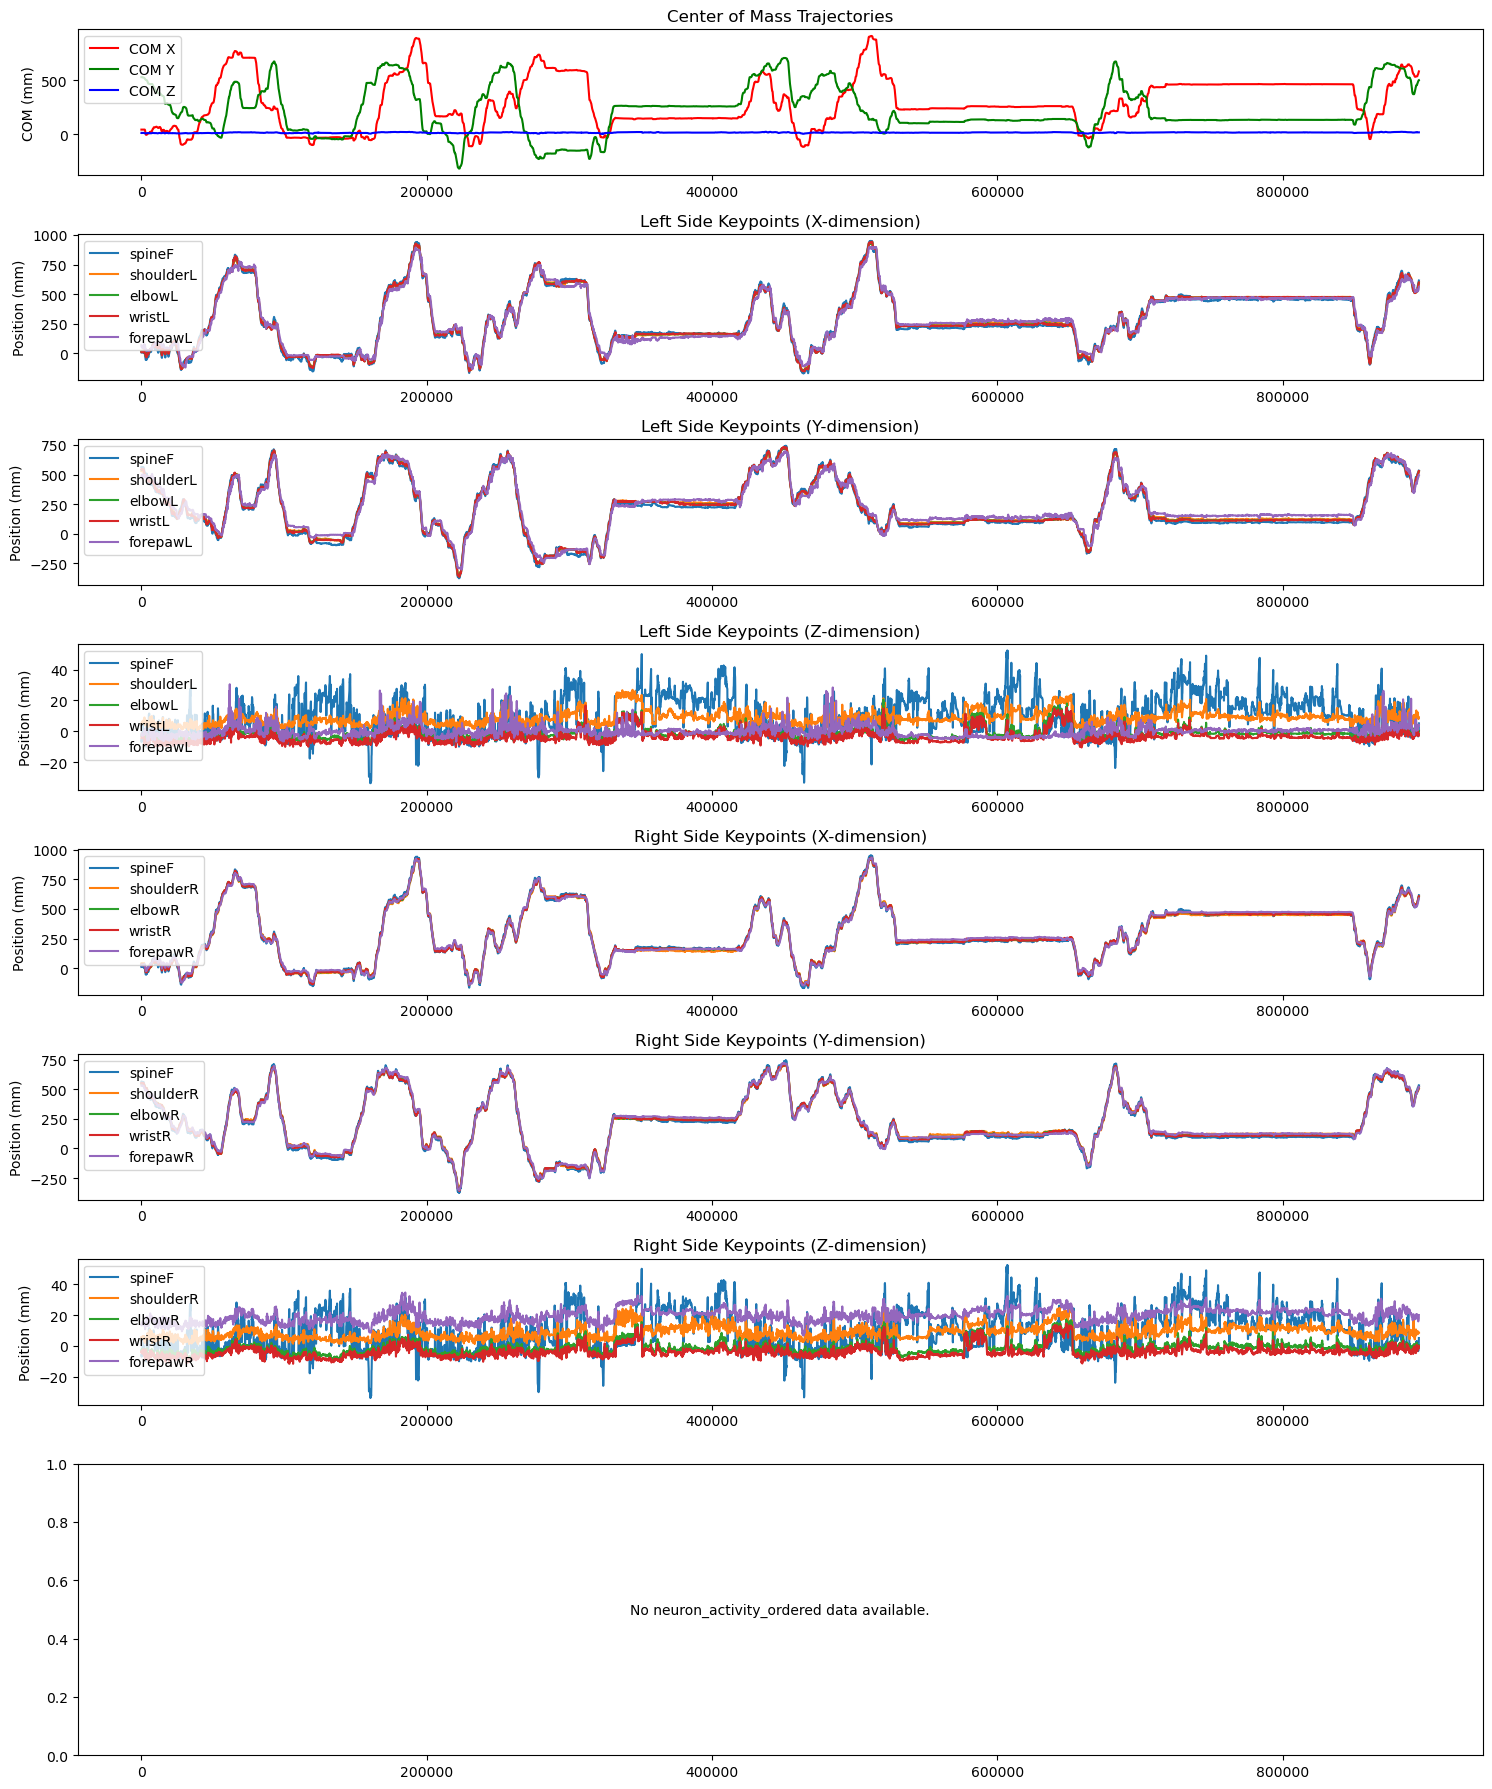

In [3]:
import matplotlib.pyplot as plt
import numpy as np

df_new = df_merged_with_dF_F
location_indices_left = [3, 11, 10, 9, 8]
location_labels_left = {3: "spineF", 11: "shoulderL", 10: "elbowL", 9: "wristL", 8: "forepawL"}

location_indices_right = [3, 15, 14, 13, 12] 
location_labels_right = {3: "spineF", 15: "shoulderR", 14: "elbowR", 13: "wristR", 12: "forepawR"}

time = df_new.index

fig = plt.figure(figsize=(15, 18))
gs = fig.add_gridspec(nrows=8, ncols=1, height_ratios=[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 3])

# 1. COM trajectories
ax1 = fig.add_subplot(gs[0, 0])
if 'com_x' in df_new.columns and 'com_y' in df_new.columns and 'com_z' in df_new.columns:
    ax1.plot(time, df_new['com_x'], color='red', label='COM X')
    ax1.plot(time, df_new['com_y'], color='green', label='COM Y')
    ax1.plot(time, df_new['com_z'], color='blue', label='COM Z')
    ax1.set_ylabel('COM (mm)')
    ax1.set_title('Center of Mass Trajectories')
    ax1.legend(loc='upper left')

# 2. Left Side Keypoints (X, Y, Z)
for i, axis in enumerate(['x', 'y', 'z']):
    ax = fig.add_subplot(gs[i+1, 0], sharex=ax1)
    ax.set_title(f'Left Side Keypoints ({axis.upper()}-dimension)')
    for idx in location_indices_left:
        col = f'kp{idx}_{axis}'
        if col in df_new.columns:
            ax.plot(time, df_new[col], label=location_labels_left[idx])
        else:
            print(f"Warning: {col} not found.")
    ax.set_ylabel('Position (mm)')
    ax.legend(loc='upper left')

# 3. Right Side Keypoints (X, Y, Z)
for i, axis in enumerate(['x', 'y', 'z']):
    ax = fig.add_subplot(gs[i+4, 0], sharex=ax1)
    ax.set_title(f'Right Side Keypoints ({axis.upper()}-dimension)')
    for idx in location_indices_right:
        col = f'kp{idx}_{axis}'
        if col in df_new.columns:
            ax.plot(time, df_new[col], label=location_labels_right[idx])
        else:
            print(f"Warning: {col} not found.")
    ax.set_ylabel('Position (mm)')
    ax.legend(loc='upper left')

# 4. Neural Activity Raster
ax4 = fig.add_subplot(gs[7, 0], sharex=ax1)
threshold = 0.5
if 'neuron_activity_ordered' in globals() and neuron_activity_ordered is not None:
    for neuron_idx, row in enumerate(neuron_activity_ordered):
        spike_times = np.where(row > threshold)[0]
        ax4.scatter(time[spike_times], np.full_like(spike_times, neuron_idx), 
                    s=2, color='black', marker='|')
    ax4.set_ylabel('Neurons')
    ax4.set_xlabel('Time')
    ax4.set_title('Neural Activity Raster')
    ax4.set_ylim([-1, neuron_activity_ordered.shape[0]])
    ax4.invert_yaxis()
else:
    ax4.text(0.5, 0.5, 'No neuron_activity_ordered data available.',
             transform=ax4.transAxes, ha='center', va='center')

plt.tight_layout()
plt.show()


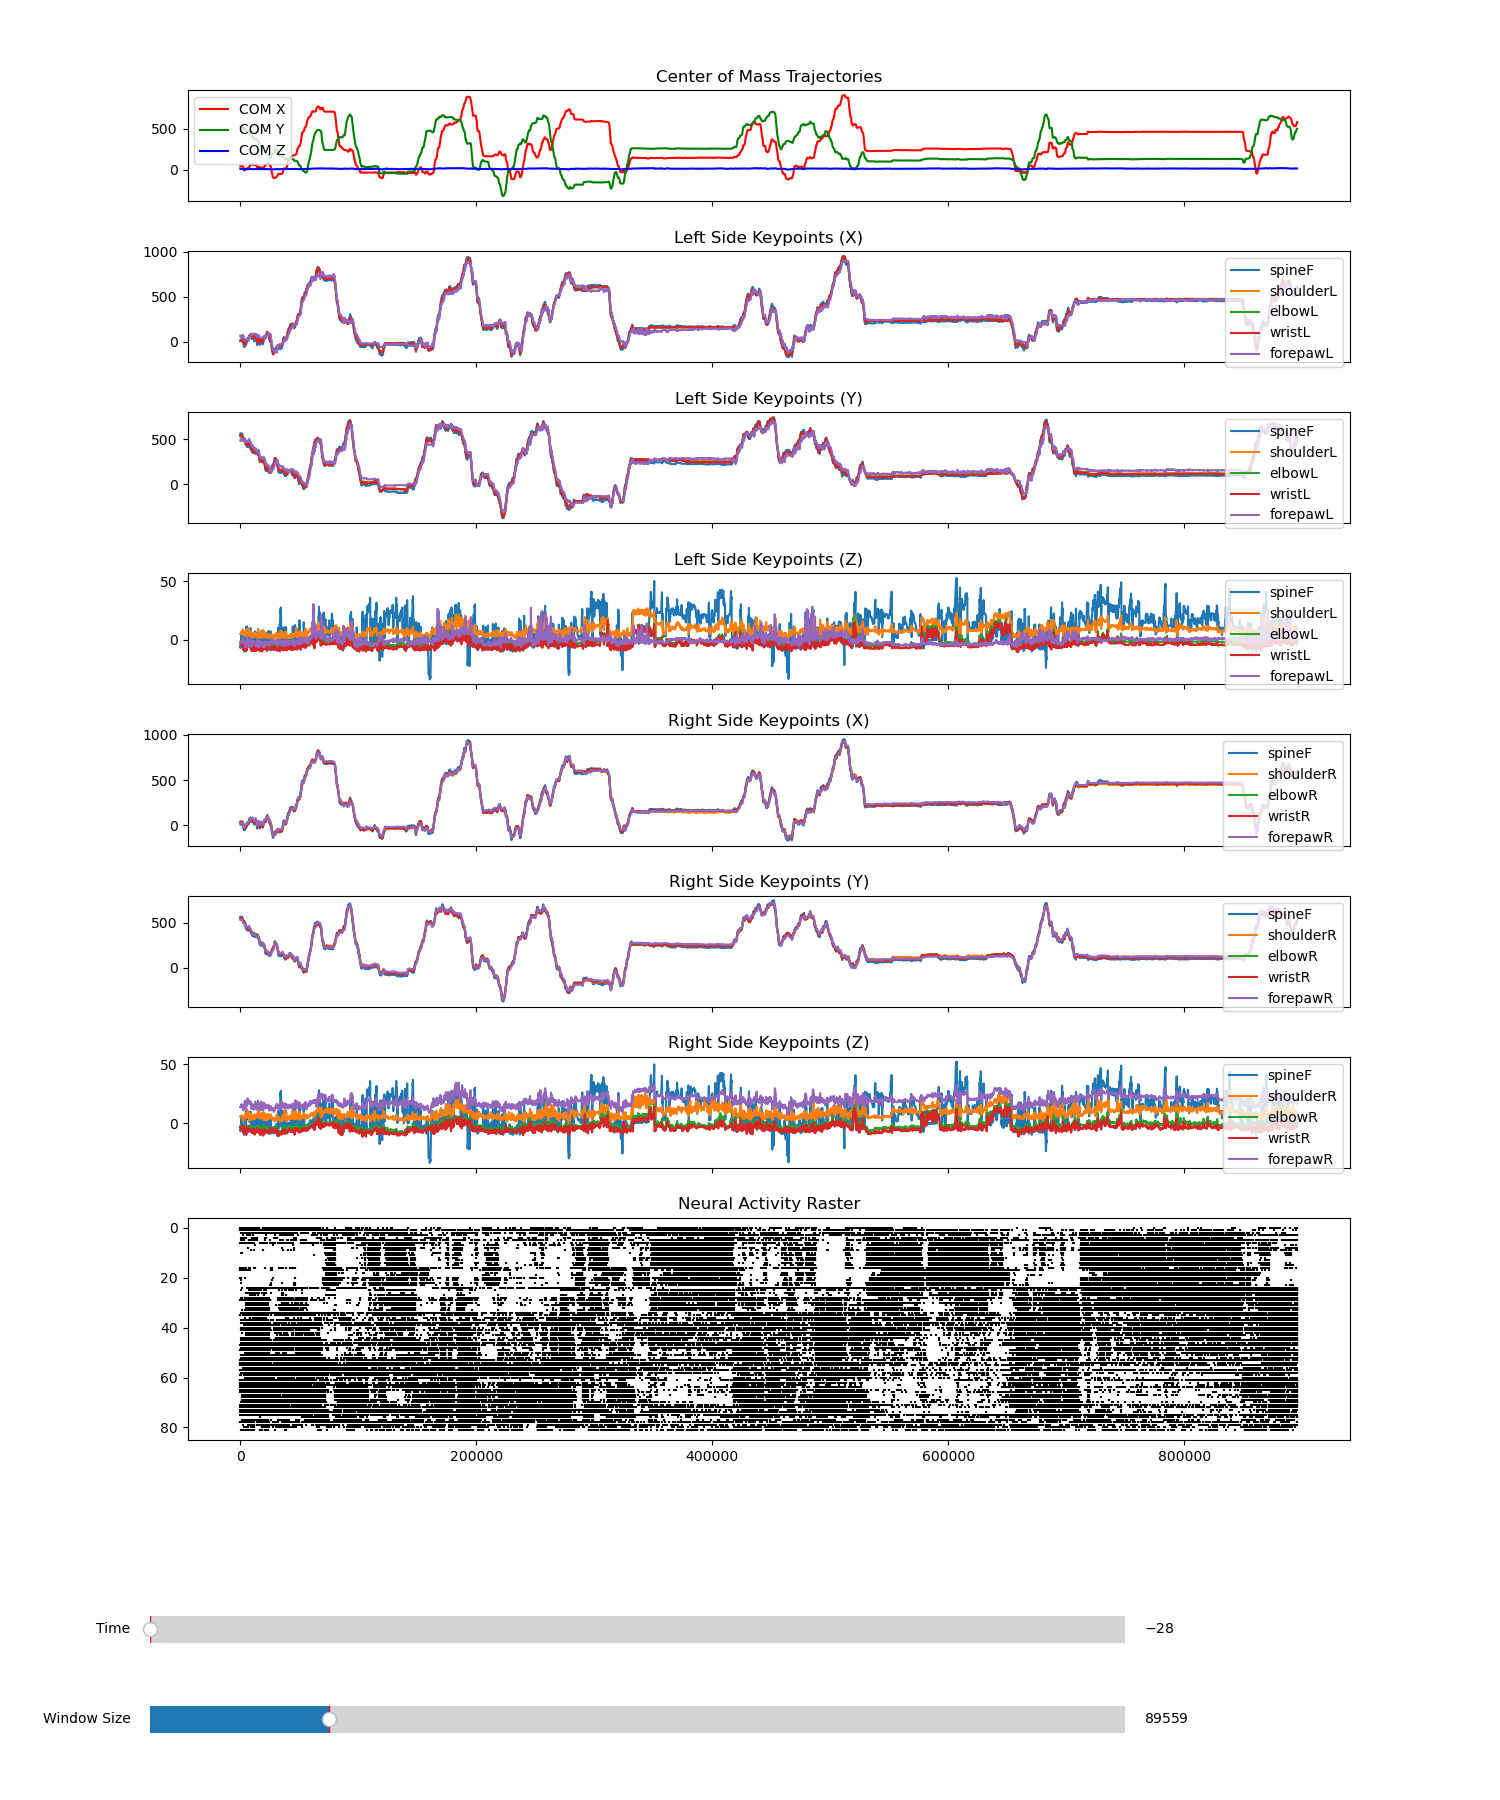

In [5]:
%matplotlib widget

import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

df_new = df_merged_with_dF_F
location_indices_left = [3, 11, 10, 9, 8]
location_labels_left = {3: "spineF", 11: "shoulderL", 10: "elbowL", 9: "wristL", 8: "forepawL"}

location_indices_right = [3, 15, 14, 13, 12] 
location_labels_right = {3: "spineF", 15: "shoulderR", 14: "elbowR", 13: "wristR", 12: "forepawR"}

time = df_new.index
time_min, time_max = time.min(), time.max()

# Default window size (10% of time range)
default_window_size = (time_max - time_min) * 0.1

# Set up figure and axes
fig, axes = plt.subplots(8, 1, figsize=(15, 18), sharex=True, gridspec_kw={'height_ratios': [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 3]})
plt.subplots_adjust(bottom=0.2, top=0.95, hspace=0.4)

# Pre-plot all data
# 1. COM Trajectories
if 'com_x' in df_new.columns and 'com_y' in df_new.columns and 'com_z' in df_new.columns:
    axes[0].plot(time, df_new['com_x'], color='red', label='COM X')
    axes[0].plot(time, df_new['com_y'], color='green', label='COM Y')
    axes[0].plot(time, df_new['com_z'], color='blue', label='COM Z')
    axes[0].set_title('Center of Mass Trajectories')
    axes[0].legend()

# 2. Left Side Keypoints
for i, axis in enumerate(['x', 'y', 'z']):
    for idx in location_indices_left:
        col = f'kp{idx}_{axis}'
        if col in df_new.columns:
            axes[i+1].plot(time, df_new[col], label=location_labels_left[idx])
    axes[i+1].set_title(f'Left Side Keypoints ({axis.upper()})')
    axes[i+1].legend()

# 3. Right Side Keypoints
for i, axis in enumerate(['x', 'y', 'z']):
    for idx in location_indices_right:
        col = f'kp{idx}_{axis}'
        if col in df_new.columns:
            axes[i+4].plot(time, df_new[col], label=location_labels_right[idx])
    axes[i+4].set_title(f'Right Side Keypoints ({axis.upper()})')
    axes[i+4].legend()

# 4. Neural Activity Raster
threshold = 0.5
if 'neuron_activity_ordered' in globals() and neuron_activity_ordered is not None:
    for neuron_idx, row in enumerate(neuron_activity_ordered):
        spike_times = np.where(row > threshold)[0]
        axes[7].scatter(time[spike_times], np.full_like(spike_times, neuron_idx), 
                        s=2, color='black', marker='|')
    axes[7].set_title('Neural Activity Raster')
    axes[7].invert_yaxis()

# Sliders: Time Slider and Window Size Slider
ax_time_slider = plt.axes([0.1, 0.08, 0.65, 0.03])
time_slider = Slider(ax_time_slider, 'Time', time_min, time_max-default_window_size, valinit=time_min)

ax_window_slider = plt.axes([0.1, 0.03, 0.65, 0.03])
window_slider = Slider(ax_window_slider, 'Window Size', 0.01 * (time_max - time_min), 
                       0.5 * (time_max - time_min), valinit=default_window_size)

# Update function for sliders
def update(val):
    t_min = time_slider.val
    window_size = window_slider.val
    t_max = t_min + window_size

    # Update x-axis limits for all axes
    for ax in axes:
        ax.set_xlim(t_min, t_max)
    fig.canvas.draw_idle()

# Link sliders to the update function
time_slider.on_changed(update)
window_slider.on_changed(update)

plt.show()


In [40]:
print(df_new[['kp3_z', 'kp11_z', 'com_x', 'com_y', 'com_z']].head())


                       kp3_z      kp11_z      com_x       com_y      com_z
timestamp_ms_mini                                                         
-28                13.306341  528.808472  41.706841  527.997575  10.797444
 76                13.974595  528.399597  41.555597  528.230113   9.798887
 173               10.965623  531.370422  41.311852  528.230113   9.676444
 284               11.859568  531.087280  41.311852  528.230113   9.676444
 383               11.683537  530.554932  41.070991  528.230113   9.798887


In [30]:
print(df_new[['com_x', 'com_y', 'com_z']].head())
for idx in location_indices_left:
    print(df_new[[f'kp{idx}_x', f'kp{idx}_y', f'kp{idx}_z']].head())


                       com_x       com_y      com_z
timestamp_ms_mini                                  
-28                41.706841  527.997575  10.797444
 76                41.555597  528.230113   9.798887
 173               41.311852  528.230113   9.676444
 284               41.311852  528.230113   9.676444
 383               41.070991  528.230113   9.798887
                       kp3_x      kp3_y      kp3_z
timestamp_ms_mini                                 
-28                81.452919  69.886948  13.306341
 76                80.317596  62.288460  13.974595
 173               79.353958  54.529400  10.965623
 284               79.850502  58.454620  11.859568
 383               78.349113  53.977798  11.683537
                       kp11_x      kp11_y      kp11_z
timestamp_ms_mini                                    
-28                544.009644  541.108582  528.808472
 76                543.055908  539.176514  528.399597
 173               546.110779  541.971680  531.370422
 284     

In [31]:
com_x = df_new[['kp3_x', 'kp11_x', 'kp10_x', 'kp9_x', 'kp8_x']].mean(axis=1)
com_y = df_new[['kp3_y', 'kp11_y', 'kp10_y', 'kp9_y', 'kp8_y']].mean(axis=1)
com_z = df_new[['kp3_z', 'kp11_z', 'kp10_z', 'kp9_z', 'kp8_z']].mean(axis=1)


Columns in df_new: ['com_x', 'com_y', 'com_z', 'kp1_x', 'kp1_y', 'kp1_z', 'kp2_x', 'kp2_y', 'kp2_z', 'kp3_x', 'kp3_y', 'kp3_z', 'kp4_x', 'kp4_y', 'kp4_z', 'kp5_x', 'kp5_y', 'kp5_z', 'kp6_x', 'kp6_y', 'kp6_z', 'kp7_x', 'kp7_y', 'kp7_z', 'kp8_x', 'kp8_y', 'kp8_z', 'kp9_x', 'kp9_y', 'kp9_z', 'kp10_x', 'kp10_y', 'kp10_z', 'kp11_x', 'kp11_y', 'kp11_z', 'kp12_x', 'kp12_y', 'kp12_z', 'kp13_x', 'kp13_y', 'kp13_z', 'kp14_x', 'kp14_y', 'kp14_z', 'kp15_x', 'kp15_y', 'kp15_z', 'kp16_x', 'kp16_y', 'kp16_z', 'kp17_x', 'kp17_y', 'kp17_z', 'kp18_x', 'kp18_y', 'kp18_z', 'kp19_x', 'kp19_y', 'kp19_z', 'kp20_x', 'kp20_y', 'kp20_z', 'kp21_x', 'kp21_y', 'kp21_z', 'kp22_x', 'kp22_y', 'kp22_z', 'calcium_roi0', 'calcium_roi1', 'calcium_roi2', 'calcium_roi3', 'calcium_roi4', 'calcium_roi5', 'calcium_roi6', 'calcium_roi7', 'calcium_roi8', 'calcium_roi9', 'calcium_roi10', 'calcium_roi11', 'calcium_roi12', 'calcium_roi13', 'calcium_roi14', 'calcium_roi15', 'calcium_roi16', 'calcium_roi17', 'calcium_roi18', 'calciu

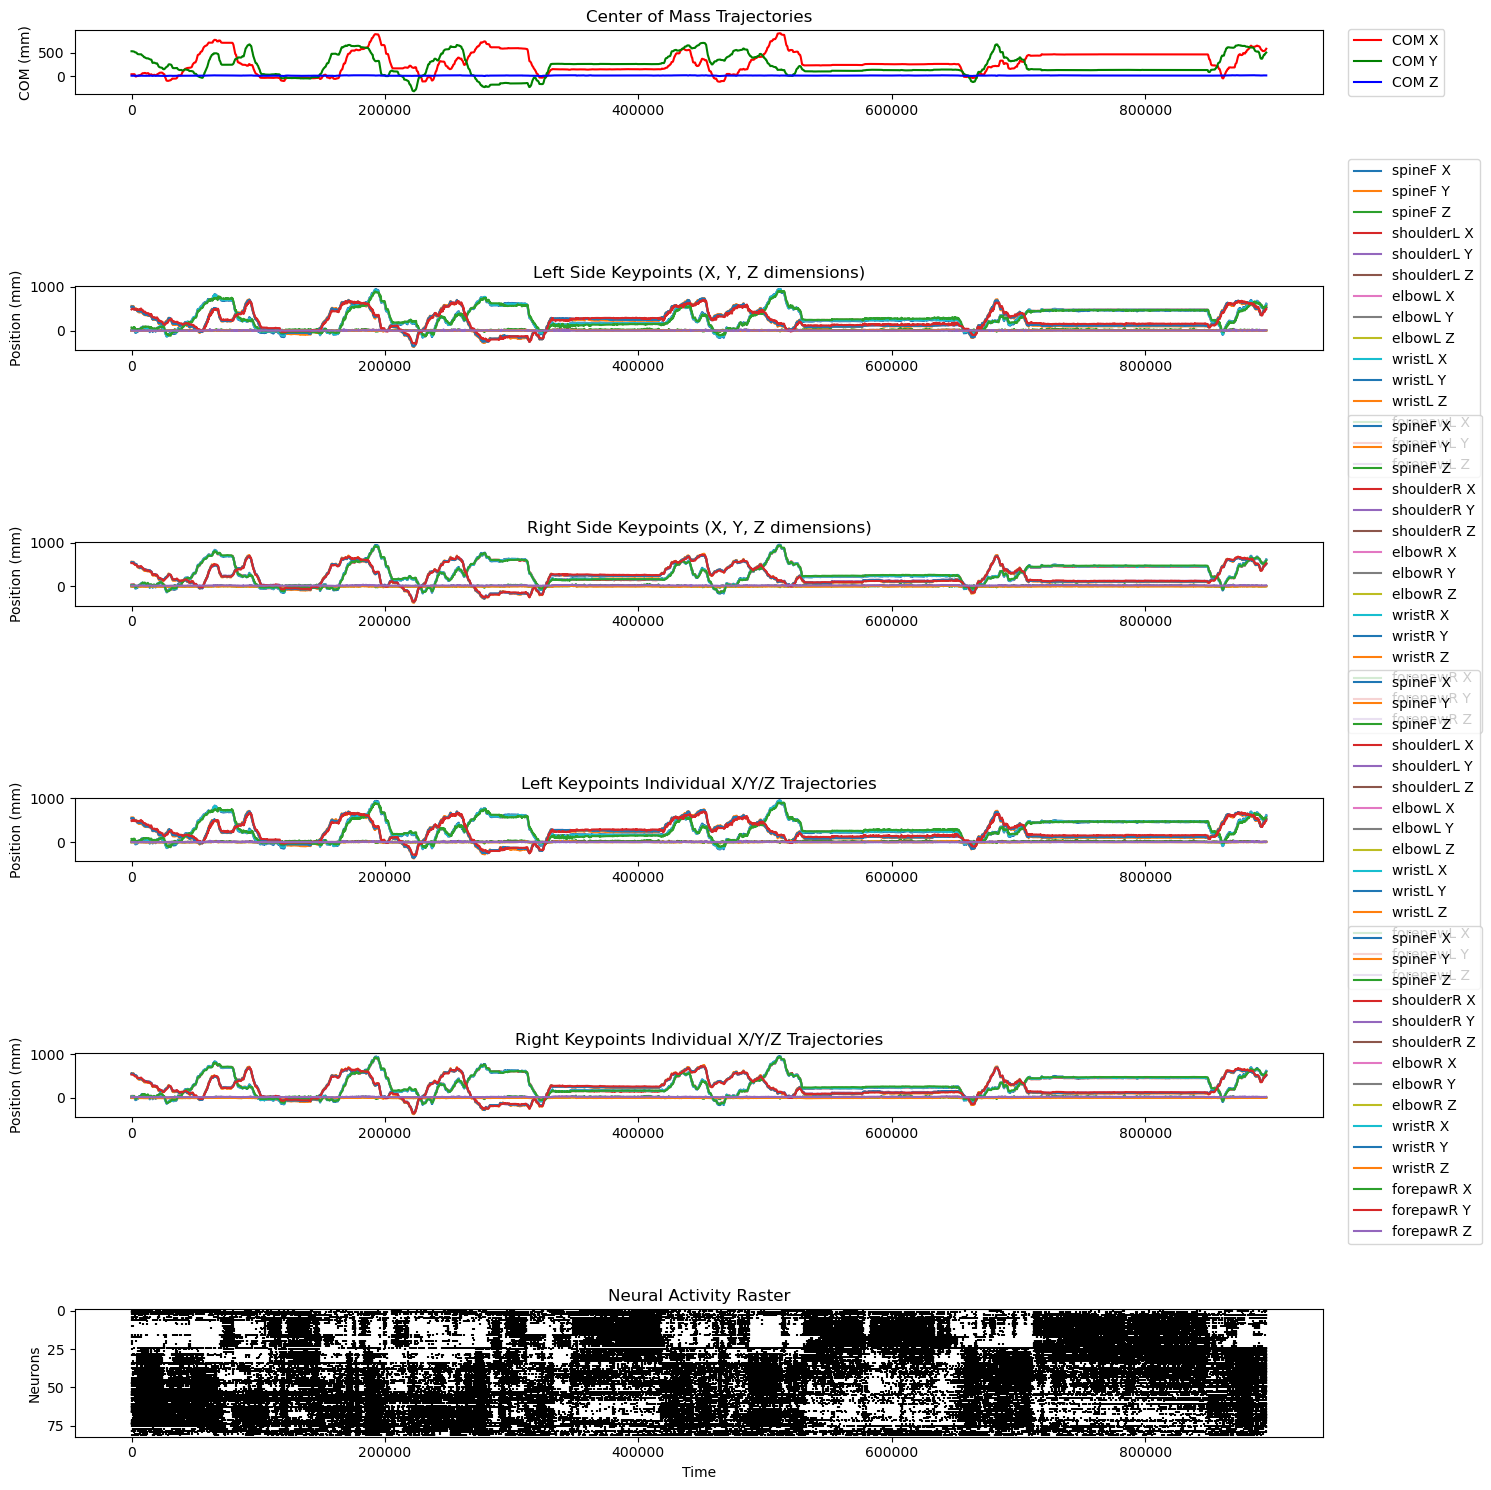

In [46]:
import matplotlib.pyplot as plt

# Example location indices and labels
location_indices_left = [3, 11, 10, 9, 8]
location_labels_left = {3: "spineF", 11: "shoulderL", 10: "elbowL", 9: "wristL", 8: "forepawL"}

location_indices_right = [3, 15, 14, 13, 12]
location_labels_right = {3: "spineF", 15: "shoulderR", 14: "elbowR", 13: "wristR", 12: "forepawR"}

time = df_new.index  # Assuming time is the index
print("Columns in df_new:", df_new.columns.tolist())  # Debug info

fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(nrows=6, ncols=1, height_ratios=[1.5, 1.5, 1.5, 1.5, 1.5, 3])

###########################################
# Function to place legend outside
###########################################
def legend_outside(ax):
    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0)

###########################################
# Top Plot: COM trajectories
###########################################
ax1 = fig.add_subplot(gs[0, 0])
if 'com_x' in df_new.columns and 'com_y' in df_new.columns and 'com_z' in df_new.columns:
    ax1.plot(time, df_new['com_x'], color='red', label='COM X')
    ax1.plot(time, df_new['com_y'], color='green', label='COM Y')
    ax1.plot(time, df_new['com_z'], color='blue', label='COM Z')
    ax1.set_ylabel('COM (mm)')
    ax1.set_title('Center of Mass Trajectories')
    legend_outside(ax1)

###########################################
# Second Plot: Left Side Keypoints (X/Y/Z)
###########################################
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax2.set_title('Left Side Keypoints (X, Y, Z dimensions)')
for idx in location_indices_left:
    for axis in ['x', 'y', 'z']:
        col_name = f'kp{idx}_{axis}'
        if col_name in df_new.columns:
            ax2.plot(time, df_new[col_name], label=f"{location_labels_left[idx]} {axis.upper()}")
legend_outside(ax2)
ax2.set_ylabel('Position (mm)')

###########################################
# Third Plot: Right Side Keypoints (X/Y/Z)
###########################################
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
ax3.set_title('Right Side Keypoints (X, Y, Z dimensions)')
for idx in location_indices_right:
    for axis in ['x', 'y', 'z']:
        col_name = f'kp{idx}_{axis}'
        if col_name in df_new.columns:
            ax3.plot(time, df_new[col_name], label=f"{location_labels_right[idx]} {axis.upper()}")
legend_outside(ax3)
ax3.set_ylabel('Position (mm)')

###########################################
# Fourth Plot: Left Keypoints Individual Subplots
###########################################
ax4 = fig.add_subplot(gs[3, 0], sharex=ax1)
ax4.set_title('Left Keypoints Individual X/Y/Z Trajectories')
for idx in location_indices_left:
    for axis in ['x', 'y', 'z']:
        col_name = f'kp{idx}_{axis}'
        if col_name in df_new.columns:
            ax4.plot(time, df_new[col_name], label=f"{location_labels_left[idx]} {axis.upper()}")
legend_outside(ax4)
ax4.set_ylabel('Position (mm)')

###########################################
# Fifth Plot: Right Keypoints Individual Subplots
###########################################
ax5 = fig.add_subplot(gs[4, 0], sharex=ax1)
ax5.set_title('Right Keypoints Individual X/Y/Z Trajectories')
for idx in location_indices_right:
    for axis in ['x', 'y', 'z']:
        col_name = f'kp{idx}_{axis}'
        if col_name in df_new.columns:
            ax5.plot(time, df_new[col_name], label=f"{location_labels_right[idx]} {axis.upper()}")
legend_outside(ax5)
ax5.set_ylabel('Position (mm)')

###########################################
# Sixth Plot: Neural Raster (If available)
###########################################
ax6 = fig.add_subplot(gs[5, 0], sharex=ax1)
threshold = 0.5
if 'neuron_activity_ordered' in globals() and neuron_activity_ordered is not None:
    for neuron_idx, row in enumerate(neuron_activity_ordered):
        spike_times = np.where(row > threshold)[0]
        ax6.scatter(time[spike_times], np.full_like(spike_times, neuron_idx), 
                    s=2, color='black', marker='|')
    ax6.set_ylabel('Neurons')
    ax6.set_xlabel('Time')
    ax6.set_title('Neural Activity Raster')
    ax6.set_ylim([-1, neuron_activity_ordered.shape[0]])
    ax6.invert_yaxis()
else:
    ax6.text(0.5, 0.5, 'No neuron_activity_ordered data available.',
             transform=ax6.transAxes, ha='center', va='center')

plt.tight_layout()
plt.show()


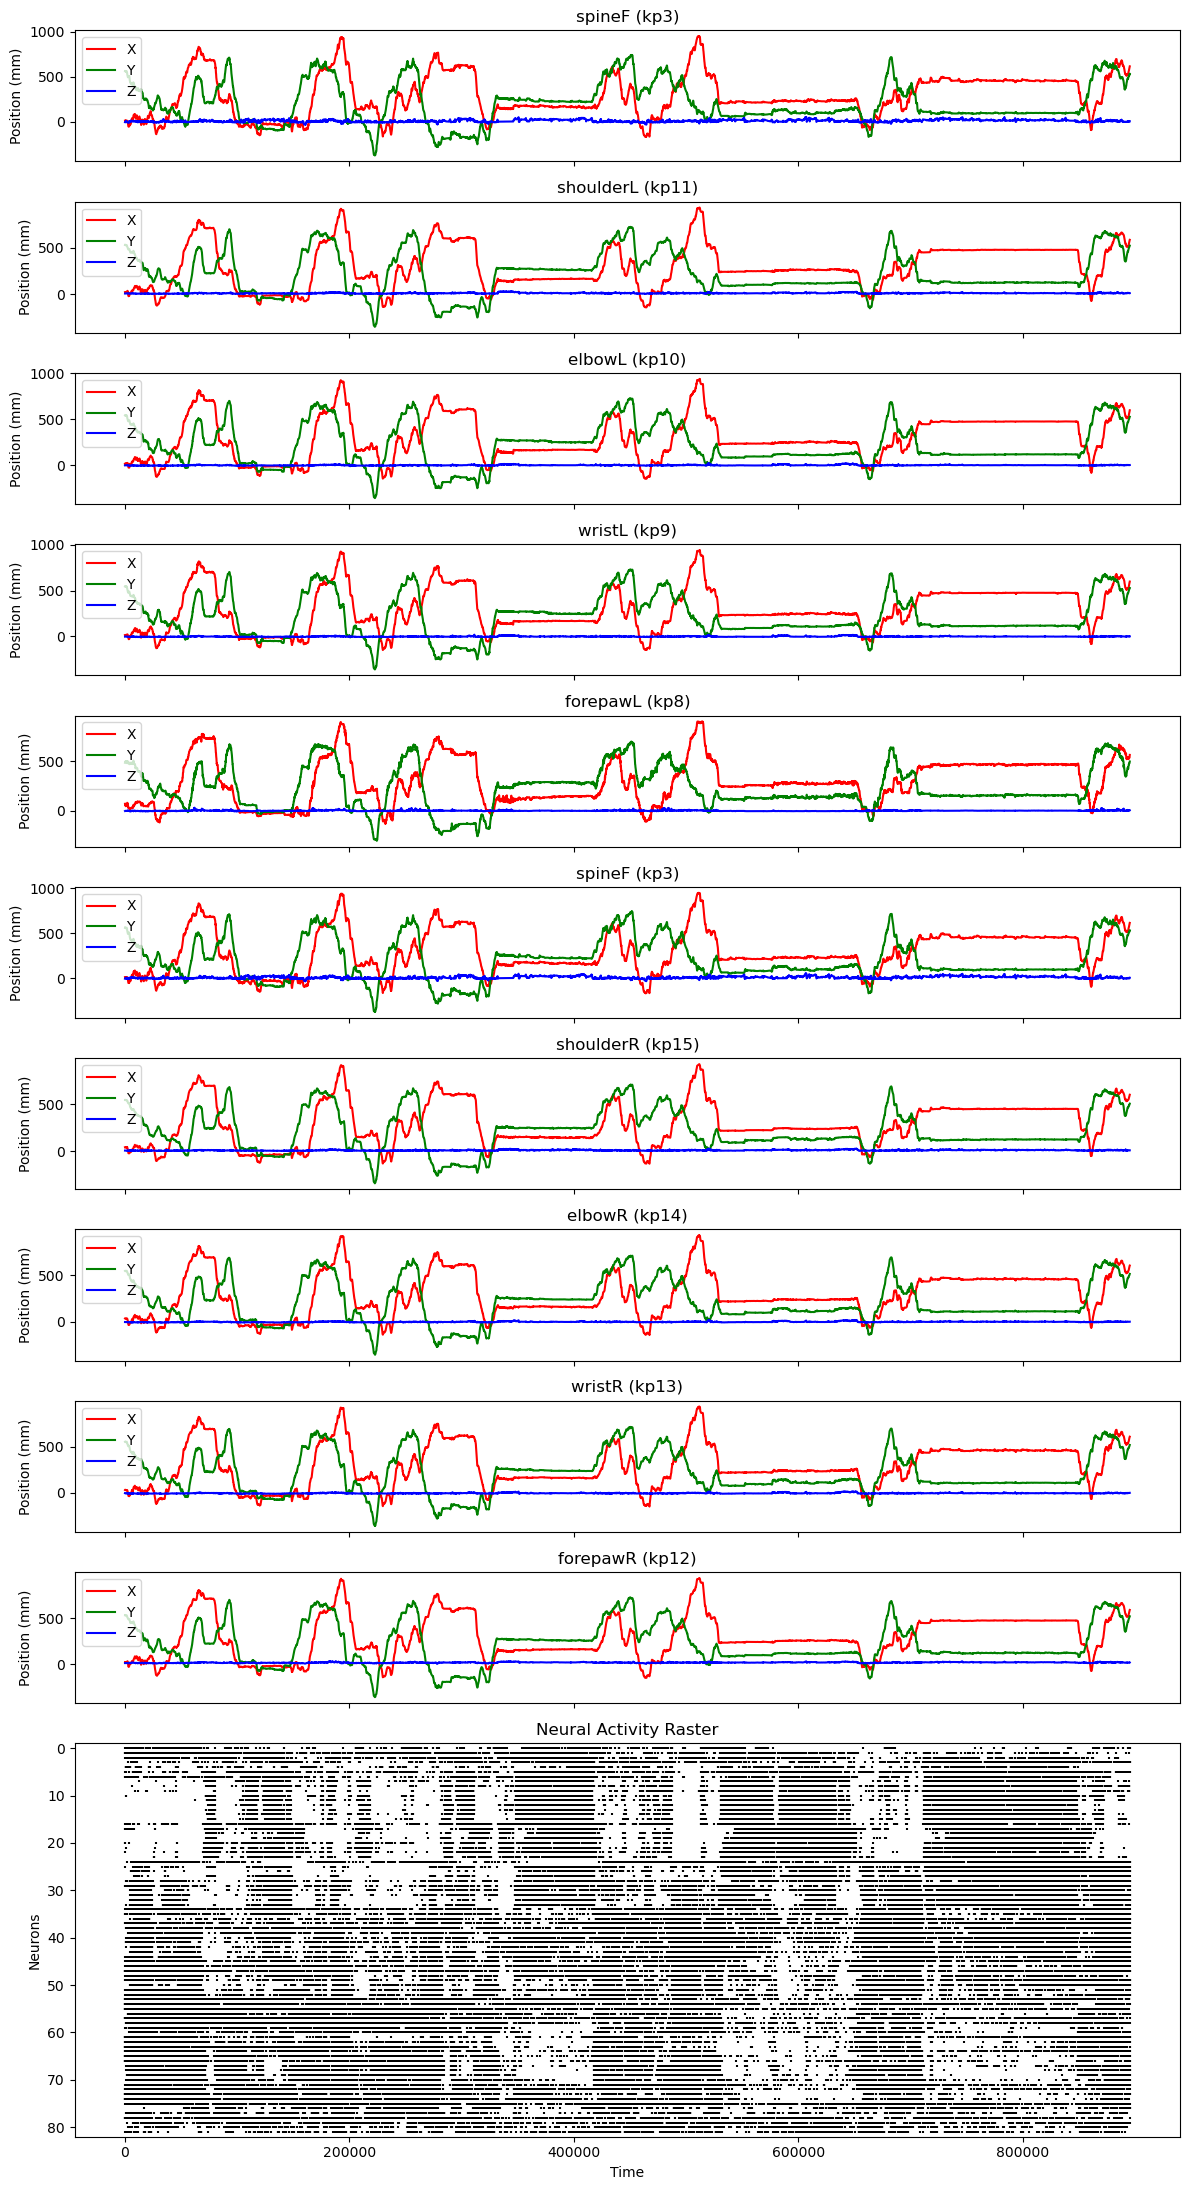

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Example keypoints
location_indices_left = [3, 11, 10, 9, 8]
location_labels_left = {3: "spineF", 11: "shoulderL", 10: "elbowL", 9: "wristL", 8: "forepawL"}

location_indices_right = [3, 15, 14, 13, 12]
location_labels_right = {3: "spineF", 15: "shoulderR", 14: "elbowR", 13: "wristR", 12: "forepawR"}

# Combine all keypoints
all_location_indices = location_indices_left + location_indices_right
all_location_labels = {**location_labels_left, **location_labels_right}

time = df_new.index  # Assuming time is the index of df_new

# Figure setup
fig, axes = plt.subplots(nrows=len(all_location_indices) + 1, ncols=1, figsize=(12, 2 * (len(all_location_indices) + 1)), 
                         sharex=True, gridspec_kw={'height_ratios': [1] * len(all_location_indices) + [3]})

# Plot each keypoint's X, Y, Z on its own subplot
for i, idx in enumerate(all_location_indices):
    ax = axes[i]
    kp_x = f'kp{idx}_x'
    kp_y = f'kp{idx}_y'
    kp_z = f'kp{idx}_z'

    plotted_any = False
    # Plot X, Y, Z if available
    if kp_x in df_new.columns:
        ax.plot(time, df_new[kp_x], color='red', label='X')
        plotted_any = True
    else:
        print(f"Warning: {kp_x} not found.")
    if kp_y in df_new.columns:
        ax.plot(time, df_new[kp_y], color='green', label='Y')
        plotted_any = True
    else:
        print(f"Warning: {kp_y} not found.")
    if kp_z in df_new.columns:
        ax.plot(time, df_new[kp_z], color='blue', label='Z')
        plotted_any = True
    else:
        print(f"Warning: {kp_z} not found.")

    ax.set_ylabel('Position (mm)')
    ax.set_title(f'{all_location_labels.get(idx, f"Keypoint {idx}")} (kp{idx})')
    if plotted_any:
        ax.legend(loc='upper left')
    else:
        ax.text(0.5, 0.5, f"No data for kp{idx}", transform=ax.transAxes, ha='center', va='center')

# Plot neural activity as a raster in the last subplot
ax_neurons = axes[-1]
threshold = 0.5  # Example threshold for raster plot

if 'neuron_activity_ordered' in globals() and neuron_activity_ordered is not None:
    for neuron_idx, row in enumerate(neuron_activity_ordered):
        spike_times = np.where(row > threshold)[0]
        ax_neurons.scatter(time[spike_times], np.full_like(spike_times, neuron_idx), 
                           s=2, color='black', marker='|')
    ax_neurons.set_ylabel('Neurons')
    ax_neurons.set_xlabel('Time')
    ax_neurons.set_title('Neural Activity Raster')
    ax_neurons.set_ylim([-1, neuron_activity_ordered.shape[0]])
    ax_neurons.invert_yaxis()
else:
    ax_neurons.text(0.5, 0.5, 'No neuron_activity_ordered data available.',
                    transform=ax_neurons.transAxes, ha='center', va='center')

plt.tight_layout()
plt.show()


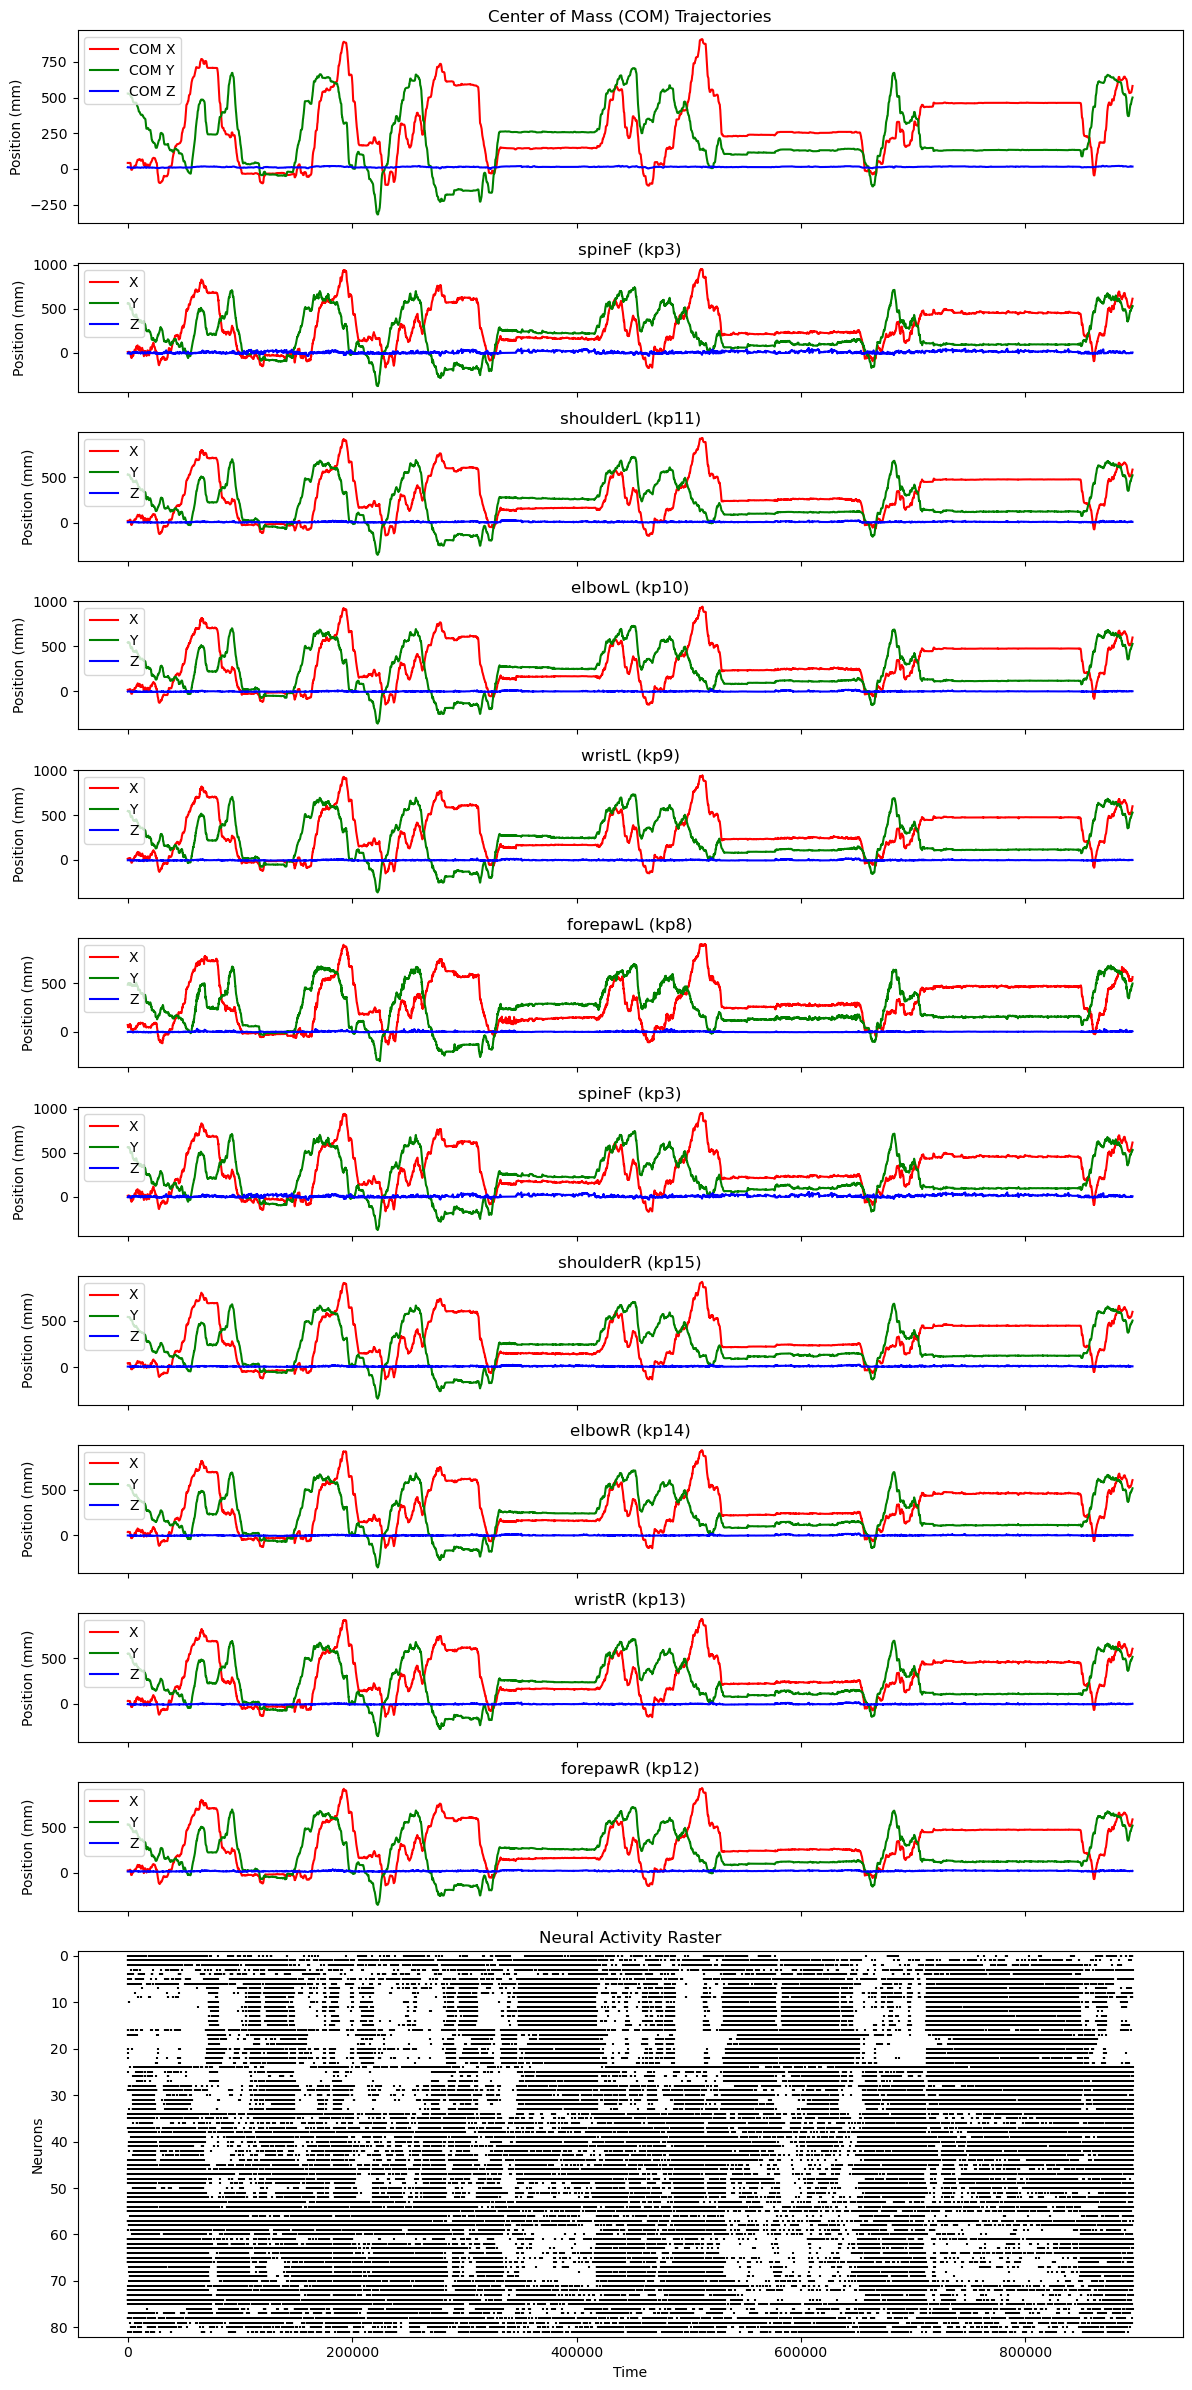

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Example keypoints
location_indices_left = [3, 11, 10, 9, 8]
location_labels_left = {3: "spineF", 11: "shoulderL", 10: "elbowL", 9: "wristL", 8: "forepawL"}

location_indices_right = [3, 15, 14, 13, 12]
location_labels_right = {3: "spineF", 15: "shoulderR", 14: "elbowR", 13: "wristR", 12: "forepawR"}

# Combine all keypoints
all_location_indices = location_indices_left + location_indices_right
all_location_labels = {**location_labels_left, **location_labels_right}

time = df_new.index  # Assuming time is the index of df_new

# Set up the figure
num_keypoints = len(all_location_indices)
fig, axes = plt.subplots(nrows=2 + num_keypoints, ncols=1, figsize=(12, 2 * (2 + num_keypoints)),
                         sharex=True, gridspec_kw={'height_ratios': [1.5] + [1] * num_keypoints + [3]})

###########################################
# Top Plot: COM Trajectories
###########################################
ax_com = axes[0]
if 'com_x' in df_new.columns and 'com_y' in df_new.columns and 'com_z' in df_new.columns:
    ax_com.plot(time, df_new['com_x'], color='red', label='COM X')
    ax_com.plot(time, df_new['com_y'], color='green', label='COM Y')
    ax_com.plot(time, df_new['com_z'], color='blue', label='COM Z')
    ax_com.set_ylabel('Position (mm)')
    ax_com.set_title('Center of Mass (COM) Trajectories')
    ax_com.legend(loc='upper left')
else:
    ax_com.text(0.5, 0.5, "COM data not found (com_x, com_y, com_z).", 
                transform=ax_com.transAxes, ha='center', va='center')

###########################################
# Middle Plots: Keypoints X, Y, Z Trajectories
###########################################
for i, idx in enumerate(all_location_indices):
    ax = axes[i + 1]  # Start from the second subplot
    kp_x = f'kp{idx}_x'
    kp_y = f'kp{idx}_y'
    kp_z = f'kp{idx}_z'

    plotted_any = False
    # Plot X, Y, Z if available
    if kp_x in df_new.columns:
        ax.plot(time, df_new[kp_x], color='red', label='X')
        plotted_any = True
    else:
        print(f"Warning: {kp_x} not found.")
    if kp_y in df_new.columns:
        ax.plot(time, df_new[kp_y], color='green', label='Y')
        plotted_any = True
    else:
        print(f"Warning: {kp_y} not found.")
    if kp_z in df_new.columns:
        ax.plot(time, df_new[kp_z], color='blue', label='Z')
        plotted_any = True
    else:
        print(f"Warning: {kp_z} not found.")

    ax.set_ylabel('Position (mm)')
    ax.set_title(f'{all_location_labels.get(idx, f"Keypoint {idx}")} (kp{idx})')
    if plotted_any:
        ax.legend(loc='upper left')
    else:
        ax.text(0.5, 0.5, f"No data for kp{idx}", transform=ax.transAxes, ha='center', va='center')

###########################################
# Bottom Plot: Neural Raster
###########################################
ax_neurons = axes[-1]
threshold = 0.5  # Example threshold for raster plot

if 'neuron_activity_ordered' in globals() and neuron_activity_ordered is not None:
    for neuron_idx, row in enumerate(neuron_activity_ordered):
        spike_times = np.where(row > threshold)[0]
        ax_neurons.scatter(time[spike_times], np.full_like(spike_times, neuron_idx), 
                           s=2, color='black', marker='|')
    ax_neurons.set_ylabel('Neurons')
    ax_neurons.set_xlabel('Time')
    ax_neurons.set_title('Neural Activity Raster')
    ax_neurons.set_ylim([-1, neuron_activity_ordered.shape[0]])
    ax_neurons.invert_yaxis()
else:
    ax_neurons.text(0.5, 0.5, 'No neuron_activity_ordered data available.',
                    transform=ax_neurons.transAxes, ha='center', va='center')

###########################################
# Final Adjustments
###########################################
plt.tight_layout()
plt.show()


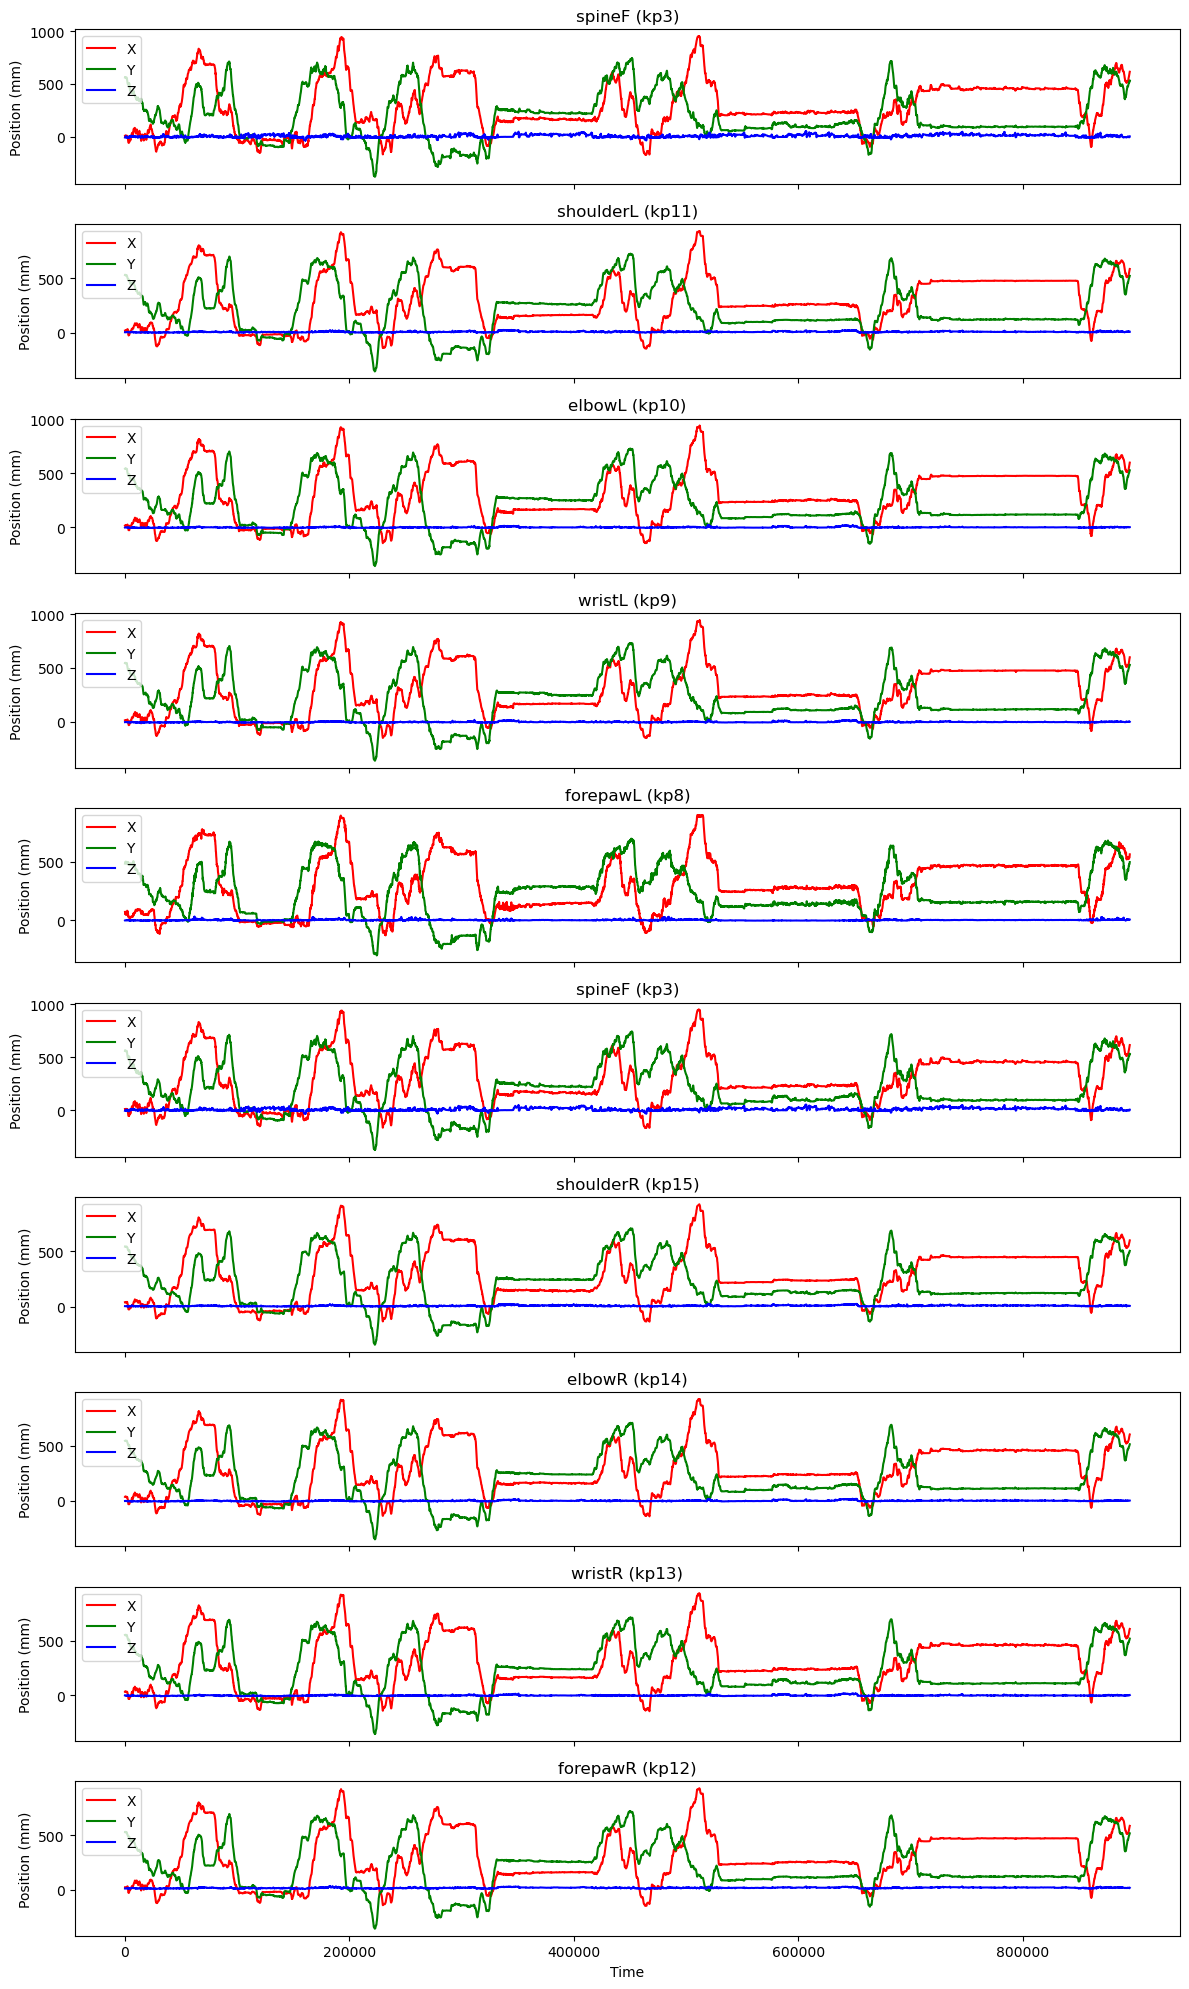

In [49]:
import matplotlib.pyplot as plt

# Example keypoints
location_indices_left = [3, 11, 10, 9, 8]
location_labels_left = {3: "spineF", 11: "shoulderL", 10: "elbowL", 9: "wristL", 8: "forepawL"}

location_indices_right = [3, 15, 14, 13, 12] 
location_labels_right = {3: "spineF", 15: "shoulderR", 14: "elbowR", 13: "wristR", 12: "forepawR"}

# Combine all keypoints if you want them all together
all_location_indices = location_indices_left + location_indices_right
all_location_labels = {**location_labels_left, **location_labels_right}

time = df_new.index  # Assuming time is the index of df_new

fig, axes = plt.subplots(nrows=len(all_location_indices), ncols=1, figsize=(12, 2*len(all_location_indices)), sharex=True)

for i, idx in enumerate(all_location_indices):
    ax = axes[i] if len(all_location_indices) > 1 else axes  # if only one keypoint, axes is not an array
    kp_x = f'kp{idx}_x'
    kp_y = f'kp{idx}_y'
    kp_z = f'kp{idx}_z'

    plotted_any = False
    # Plot X if it exists
    if kp_x in df_new.columns:
        ax.plot(time, df_new[kp_x], color='red', label='X')
        plotted_any = True
    else:
        print(f"Warning: {kp_x} not found.")
    # Plot Y if it exists
    if kp_y in df_new.columns:
        ax.plot(time, df_new[kp_y], color='green', label='Y')
        plotted_any = True
    else:
        print(f"Warning: {kp_y} not found.")
    # Plot Z if it exists
    if kp_z in df_new.columns:
        ax.plot(time, df_new[kp_z], color='blue', label='Z')
        plotted_any = True
    else:
        print(f"Warning: {kp_z} not found.")

    ax.set_ylabel('Position (mm)')
    ax.set_title(f'{all_location_labels.get(idx, f"Keypoint {idx}")} (kp{idx})')
    if plotted_any:
        ax.legend(loc='upper left')
    else:
        # In case no data was found for this keypoint
        ax.text(0.5, 0.5, f"No data for kp{idx}", transform=ax.transAxes, ha='center', va='center')

axes[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()
